In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import statsmodels.api as sm 
#from statmodels.formula.api import ols
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

winp=pd.read_excel(r"C:\Users\kt186034\OneDrive \Documents\Documents\pesronal\learning\R\16Jan\Final Project\Win_Prediction_Data.xlsx")

#winp = pd.Dataframe(pd.Series(winp)
#Repalce ' ' with '_'
winp.columns = winp.columns.str.replace(' ','_')

winp.info()

## Handiling Duplicate records
duplicate= winp.duplicated()
#print(duplicate.sum())
#winp[duplicate]
winp.drop_duplicates(inplace=True)
winp['quarter'] = winp['Deal_Date'].dt.quarter
winp['year'] = winp['Deal_Date'].dt.year
winp['VP_Name'] = winp['VP_Name'].str.upper()
winp['Manager_Name'] = winp['Manager_Name'].str.upper()
winp['month'] = pd.DatetimeIndex(winp['Deal_Date']).month
winp.isnull().sum()
winp.dropna(inplace=True)
winp.isnull().sum()

winp=winp[winp['Client_Category']!='Internal']
winp.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client_Category   9982 non-null   object        
 1   Solution_Type     10061 non-null  object        
 2   Deal_Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP_Name           10061 non-null  object        
 6   Manager_Name      10061 non-null  object        
 7   Deal_Cost         10061 non-null  float64       
 8   Deal_Status_Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


(8517, 12)

In [11]:
winp['Deal_Status_Code'].value_counts(normalize=True)


Lost    0.650816
Won     0.349184
Name: Deal_Status_Code, dtype: float64

In [87]:
winp2 = winp.copy()

In [88]:
##vp manaegr
winp_vp2=pd.pivot_table(winp,index=["VP_Name","Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp2
a=winp_vp2[:-1]['len','Deal_Cost','Won']
mean = winp_vp2[:-1]['len','Deal_Cost','Won'].mean()
#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp2[:-1]['len','Deal_Cost','All']
#print(a,mean,b,sums)

winp_vp2['vp_man_wincount']=(a*(a+(10*mean))/(sums+10))
#winp_vp2['vp_wincount']=winp_vp2['vp_man_wincount']/winp_vp2[0:892]['len','Deal_Cost','All'].sum()
a=winp_vp2[:-1]['sum','Deal_Cost','Won']
mean = winp_vp2[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp2[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp2['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp2['vp_man_winper']=winp_vp2['sum','Deal_Cost','Won']/winp_vp2[:-1]['sum','Deal_Cost','All'].sum()
winp_vp2

sum                \
                                         Deal_Cost                 
Deal_Status_Code                              Lost           Won   
VP_Name       Manager_Name                                         
ALAM SYED     ABHINAV WARRIER         9.705882e+05  0.000000e+00   
              ALAM SYED               0.000000e+00  7.058824e+06   
              DARIN VATH              5.358824e+06  1.314059e+07   
              DEEPAK CHANDRA PRAKASH  7.058824e+06  3.470588e+06   
              GENNY MCGIVNEY          0.000000e+00  1.375882e+06   
...                                            ...           ...   
VIKRAM RAWAT  SARWAN SINGH            0.000000e+00  3.123824e+06   
              SUNDER PAAL             0.000000e+00  2.500000e+05   
VISVAJEET DAS GUNJAN SINGH            2.352941e+06  0.000000e+00   
              KESHAR ANSARI           0.000000e+00  5.588235e+06   
All                                   4.006052e+09  2.175636e+09   

                                                         len                \
                                                   Deal_Cost                 
Deal_Status_Code                               All      Lost   Won     All   
VP_Name       Manager_Name                                                   
ALAM SYED     ABHINAV WARRIER         9.705882e+05         2     0     2.0   
              ALAM SYED               7.058824e+06         0     2     2.0   
              DARIN VATH              1.849941e+07         8    17    25.0   
              DEEPAK CHANDRA PRAKASH  1.052941e+07         6     2     8.0   
              GENNY MCGIVNEY          1.375882e+06         0     2     2.0   
...                                            ...       ...   ...     ...   
VIKRAM RAWAT  SARWAN SINGH            3.123824e+06         0     4     4.0   
              SUNDER PAAL             2.500000e+05         0     1     1.0   
VISVAJEET DAS GUNJAN SINGH            2.352941e+06         2     0     2.0   
              KESHAR ANSARI           5.588235e+06         0     1     1.0   
All                                   6.181689e+09      5543  2974  8517.0   

                                     vp_man_wincount vp_man_winper  
                                                                    
Deal_Status_Code                                                    
VP_Name       Manager_Name                                          
ALAM SYED     ABHINAV WARRIER               0.000000      0.000000  
              ALAM SYED                     5.890135      0.001142  
              DARIN VATH                   24.451249      0.002126  
              DEEPAK CHANDRA PRAKASH        3.926756      0.000561  
              GENNY MCGIVNEY                5.890135      0.000223  
...                                              ...           ...  
VIKRAM RAWAT  SARWAN SINGH                 10.668802      0.000505  
              SUNDER PAAL                   3.121892      0.000040  
VISVAJEET DAS GUNJAN SINGH                  0.000000      0.000000  
              KESHAR ANSARI                 3.121892      0.000904  
All                                              NaN      0.351949  

[893 rows x 8 columns]

In [89]:
#pd.set_option("display.max_rows", None)
##vp manaegr
winp_vp3=pd.pivot_table(winp,index=["Solution_Type","VP_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp3


sum                              \
                                  Deal_Cost                               
Deal_Status_Code                       Lost           Won           All   
Solution_Type VP_Name                                                     
Solution 1    JEWELL TUNSTALL  4.482353e+05  8.235294e+04  5.305882e+05   
Solution 10   ANKITA AGGARWAL  1.014765e+08  4.797971e+07  1.494562e+08   
              BRENDON WYCOFF   2.529412e+06  8.882353e+06  1.141176e+07   
              CLINTON MANI     1.764706e+06  2.794118e+05  2.044118e+06   
              EARLINE LANGTON  0.000000e+00  5.294118e+05  5.294118e+05   
...                                     ...           ...           ...   
Solution 9    SON MCCONNAUGHY  1.867647e+07  8.486471e+06  2.716294e+07   
              VARSHA ARORA     9.794118e+06  2.411765e+06  1.220588e+07   
              VIDUR HUKLE      1.165000e+07  8.302941e+06  1.995294e+07   
              VIKRAM RAWAT     5.801765e+06  3.500000e+05  6.151765e+06   
All                            4.006052e+09  2.175636e+09  6.181689e+09   

                                    len                
                              Deal_Cost                
Deal_Status_Code                   Lost   Won     All  
Solution_Type VP_Name                                  
Solution 1    JEWELL TUNSTALL         2     1     3.0  
Solution 10   ANKITA AGGARWAL       192    91   283.0  
              BRENDON WYCOFF          4     3     7.0  
              CLINTON MANI            2     1     3.0  
              EARLINE LANGTON         0     1     1.0  
...                                 ...   ...     ...  
Solution 9    SON MCCONNAUGHY        34    18    52.0  
              VARSHA ARORA           12     5    17.0  
              VIDUR HUKLE            20    17    37.0  
              VIKRAM RAWAT            2     2     4.0  
All                                5543  2974  8517.0  

[596 rows x 6 columns]

In [90]:
winp_vp3
a=winp_vp3[:-1]['len','Deal_Cost','Won']

mean = winp_vp3[:-1]['len','Deal_Cost','Won'].mean()

#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp3[:-1]['len','Deal_Cost','All']

#print(a,mean,b,sums)

winp_vp3['Sol_vp_wincount']=(a*(a+(10*mean))/(sums+10))

a=winp_vp3[:-1]['sum','Deal_Cost','Won']
mean = winp_vp3[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp3[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp2['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp3['Sol_vp_winper']=winp_vp3['sum','Deal_Cost','Won']/winp_vp3[:-1]['sum','Deal_Cost','All'].sum()
winp_vp3

sum                              \
                                  Deal_Cost                               
Deal_Status_Code                       Lost           Won           All   
Solution_Type VP_Name                                                     
Solution 1    JEWELL TUNSTALL  4.482353e+05  8.235294e+04  5.305882e+05   
Solution 10   ANKITA AGGARWAL  1.014765e+08  4.797971e+07  1.494562e+08   
              BRENDON WYCOFF   2.529412e+06  8.882353e+06  1.141176e+07   
              CLINTON MANI     1.764706e+06  2.794118e+05  2.044118e+06   
              EARLINE LANGTON  0.000000e+00  5.294118e+05  5.294118e+05   
...                                     ...           ...           ...   
Solution 9    SON MCCONNAUGHY  1.867647e+07  8.486471e+06  2.716294e+07   
              VARSHA ARORA     9.794118e+06  2.411765e+06  1.220588e+07   
              VIDUR HUKLE      1.165000e+07  8.302941e+06  1.995294e+07   
              VIKRAM RAWAT     5.801765e+06  3.500000e+05  6.151765e+06   
All                            4.006052e+09  2.175636e+09  6.181689e+09   

                                    len               Sol_vp_wincount  \
                              Deal_Cost                                 
Deal_Status_Code                   Lost   Won     All                   
Solution_Type VP_Name                                                   
Solution 1    JEWELL TUNSTALL         2     1     3.0        3.921784   
Solution 10   ANKITA AGGARWAL       192    91   283.0       43.786589   
              BRENDON WYCOFF          4     3     7.0        9.349975   
              CLINTON MANI            2     1     3.0        3.921784   
              EARLINE LANGTON         0     1     1.0        4.634836   
...                                 ...   ...     ...             ...   
Solution 9    SON MCCONNAUGHY        34    18    52.0       19.737056   
              VARSHA ARORA           12     5    17.0       10.182073   
              VIDUR HUKLE            20    17    37.0       24.227964   
              VIKRAM RAWAT            2     2     4.0        7.426170   
All                                5543  2974  8517.0             NaN   

                              Sol_vp_winper  
                                             
Deal_Status_Code                             
Solution_Type VP_Name                        
Solution 1    JEWELL TUNSTALL      0.000013  
Solution 10   ANKITA AGGARWAL      0.007762  
              BRENDON WYCOFF       0.001437  
              CLINTON MANI         0.000045  
              EARLINE LANGTON      0.000086  
...                                     ...  
Solution 9    SON MCCONNAUGHY      0.001373  
              VARSHA ARORA         0.000390  
              VIDUR HUKLE          0.001343  
              VIKRAM RAWAT         0.000057  
All                                0.351949  

[596 rows x 8 columns]

In [91]:
#pd.set_option("display.max_rows", None)
##vp manaegr
winp_vp4=pd.pivot_table(winp,index=["Solution_Type","Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp4

sum                              \
                                   Deal_Cost                               
Deal_Status_Code                        Lost           Won           All   
Solution_Type Manager_Name                                                 
Solution 1    ROOP SACHDEVA     4.482353e+05  8.235294e+04  5.305882e+05   
Solution 10   AAMIR HUSSAIN     2.611765e+06  7.164706e+05  3.328235e+06   
              ABHINAV WARRIER   6.764706e+05  3.088235e+05  9.852941e+05   
              ABHISHEK SINGHAL  0.000000e+00  3.205882e+05  3.205882e+05   
              ADITYA KUMAR      0.000000e+00  6.794118e+05  6.794118e+05   
...                                      ...           ...           ...   
Solution 9    VINAY KUMAR       1.176471e+06  0.000000e+00  1.176471e+06   
              VINIT KATARIYA    1.764706e+06  0.000000e+00  1.764706e+06   
              VIRAK KANDPAL     7.941176e+06  7.561765e+06  1.550294e+07   
              ZULEMA PERRINE    8.204706e+06  6.176471e+05  8.822353e+06   
All                             4.006052e+09  2.175636e+09  6.181689e+09   

                                     len                
                               Deal_Cost                
Deal_Status_Code                    Lost   Won     All  
Solution_Type Manager_Name                              
Solution 1    ROOP SACHDEVA            2     1     3.0  
Solution 10   AAMIR HUSSAIN            2     1     3.0  
              ABHINAV WARRIER          4     2     6.0  
              ABHISHEK SINGHAL         0     2     2.0  
              ADITYA KUMAR             0     2     2.0  
...                                  ...   ...     ...  
Solution 9    VINAY KUMAR              4     0     4.0  
              VINIT KATARIYA           2     0     2.0  
              VIRAK KANDPAL            6     3     9.0  
              ZULEMA PERRINE           8     1     9.0  
All                                 5543  2974  8517.0  

[1391 rows x 6 columns]

In [92]:
winp_vp4
a=winp_vp4[:-1]['len','Deal_Cost','Won']
mean = winp_vp4[:-1]['len','Deal_Cost','Won'].mean()
sums=winp_vp4[:-1]['len','Deal_Cost','All']
winp_vp4['Sol_man_wincount']=(a*(a+(10*mean))/(sums+10))

a=winp_vp4[:-1]['sum','Deal_Cost','Won']
mean = winp_vp4[:-1]['sum','Deal_Cost','Won'].mean()
sums=winp_vp4[:-1]['sum','Deal_Cost','All'].sum()
winp_vp4['Sol_man_winper']=winp_vp4['sum','Deal_Cost','Won']/winp_vp4[:-1]['sum','Deal_Cost','All'].sum()
winp_vp4

sum                              \
                                   Deal_Cost                               
Deal_Status_Code                        Lost           Won           All   
Solution_Type Manager_Name                                                 
Solution 1    ROOP SACHDEVA     4.482353e+05  8.235294e+04  5.305882e+05   
Solution 10   AAMIR HUSSAIN     2.611765e+06  7.164706e+05  3.328235e+06   
              ABHINAV WARRIER   6.764706e+05  3.088235e+05  9.852941e+05   
              ABHISHEK SINGHAL  0.000000e+00  3.205882e+05  3.205882e+05   
              ADITYA KUMAR      0.000000e+00  6.794118e+05  6.794118e+05   
...                                      ...           ...           ...   
Solution 9    VINAY KUMAR       1.176471e+06  0.000000e+00  1.176471e+06   
              VINIT KATARIYA    1.764706e+06  0.000000e+00  1.764706e+06   
              VIRAK KANDPAL     7.941176e+06  7.561765e+06  1.550294e+07   
              ZULEMA PERRINE    8.204706e+06  6.176471e+05  8.822353e+06   
All                             4.006052e+09  2.175636e+09  6.181689e+09   

                                     len               Sol_man_wincount  \
                               Deal_Cost                                  
Deal_Status_Code                    Lost   Won     All                    
Solution_Type Manager_Name                                                
Solution 1    ROOP SACHDEVA            2     1     3.0         1.722745   
Solution 10   AAMIR HUSSAIN            2     1     3.0         1.722745   
              ABHINAV WARRIER          4     2     6.0         2.924460   
              ABHISHEK SINGHAL         0     2     2.0         3.899281   
              ADITYA KUMAR             0     2     2.0         3.899281   
...                                  ...   ...     ...              ...   
Solution 9    VINAY KUMAR              4     0     4.0         0.000000   
              VINIT KATARIYA           2     0     2.0         0.000000   
              VIRAK KANDPAL            6     3     9.0         3.851950   
              ZULEMA PERRINE           8     1     9.0         1.178720   
All                                 5543  2974  8517.0              NaN   

                               Sol_man_winper  
                                               
Deal_Status_Code                               
Solution_Type Manager_Name                     
Solution 1    ROOP SACHDEVA          0.000013  
Solution 10   AAMIR HUSSAIN          0.000116  
              ABHINAV WARRIER        0.000050  
              ABHISHEK SINGHAL       0.000052  
              ADITYA KUMAR           0.000110  
...                                       ...  
Solution 9    VINAY KUMAR            0.000000  
              VINIT KATARIYA         0.000000  
              VIRAK KANDPAL          0.001223  
              ZULEMA PERRINE         0.000100  
All                                  0.351949  

[1391 rows x 8 columns]

In [93]:
#pd.set_option("display.max_rows", None)
##vp manaegr
winp_vp5=pd.pivot_table(winp,index=["Client_Category","VP_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp5

sum                              \
                                     Deal_Cost                               
Deal_Status_Code                          Lost           Won           All   
Client_Category VP_Name                                                      
Airpline        ANKITA AGGARWAL   5.911765e+05  7.794118e+04  6.691177e+05   
                BRENDON WYCOFF    1.767647e+06  0.000000e+00  1.767647e+06   
                CLINTON MANI      5.882353e+05  0.000000e+00  5.882353e+05   
                GAURAV SAMERIA    7.352941e+05  0.000000e+00  7.352941e+05   
                LILLI STORRS      0.000000e+00  2.941177e+05  2.941177e+05   
...                                        ...           ...           ...   
e-commerce      HARDEEP SUKSMA    0.000000e+00  3.264706e+06  3.264706e+06   
                MANGESH K. SINGH  3.167647e+06  5.794118e+05  3.747059e+06   
                RAHUL BAJPAI      3.529412e+05  0.000000e+00  3.529412e+05   
                SARGAR DEEP RAO   1.117647e+06  2.105882e+06  3.223529e+06   
All                               4.006052e+09  2.175636e+09  6.181689e+09   

                                       len                
                                 Deal_Cost                
Deal_Status_Code                      Lost   Won     All  
Client_Category VP_Name                                   
Airpline        ANKITA AGGARWAL          4     1     5.0  
                BRENDON WYCOFF           4     0     4.0  
                CLINTON MANI             2     0     2.0  
                GAURAV SAMERIA           2     0     2.0  
                LILLI STORRS             0     1     1.0  
...                                    ...   ...     ...  
e-commerce      HARDEEP SUKSMA           0     2     2.0  
                MANGESH K. SINGH         6     2     8.0  
                RAHUL BAJPAI             2     0     2.0  
                SARGAR DEEP RAO          6     5    11.0  
All                                   5543  2974  8517.0  

[642 rows x 6 columns]

In [94]:
winp_vp5
a=winp_vp5[:-1]['len','Deal_Cost','Won']
mean = winp_vp5[:-1]['len','Deal_Cost','Won'].mean()
sums=winp_vp5[:-1]['len','Deal_Cost','All']
winp_vp5['cat_vp_wincount']=(a*(a+(10*mean))/(sums+10))

a=winp_vp5[:-1]['sum','Deal_Cost','Won']
mean = winp_vp5[:-1]['sum','Deal_Cost','Won'].mean()
sums=winp_vp5[:-1]['sum','Deal_Cost','All'].sum()
winp_vp5['cat_vp_winper']=winp_vp5['sum','Deal_Cost','Won']/winp_vp5[:-1]['sum','Deal_Cost','All'].sum()
winp_vp5

sum                              \
                                     Deal_Cost                               
Deal_Status_Code                          Lost           Won           All   
Client_Category VP_Name                                                      
Airpline        ANKITA AGGARWAL   5.911765e+05  7.794118e+04  6.691177e+05   
                BRENDON WYCOFF    1.767647e+06  0.000000e+00  1.767647e+06   
                CLINTON MANI      5.882353e+05  0.000000e+00  5.882353e+05   
                GAURAV SAMERIA    7.352941e+05  0.000000e+00  7.352941e+05   
                LILLI STORRS      0.000000e+00  2.941177e+05  2.941177e+05   
...                                        ...           ...           ...   
e-commerce      HARDEEP SUKSMA    0.000000e+00  3.264706e+06  3.264706e+06   
                MANGESH K. SINGH  3.167647e+06  5.794118e+05  3.747059e+06   
                RAHUL BAJPAI      3.529412e+05  0.000000e+00  3.529412e+05   
                SARGAR DEEP RAO   1.117647e+06  2.105882e+06  3.223529e+06   
All                               4.006052e+09  2.175636e+09  6.181689e+09   

                                       len               cat_vp_wincount  \
                                 Deal_Cost                                 
Deal_Status_Code                      Lost   Won     All                   
Client_Category VP_Name                                                    
Airpline        ANKITA AGGARWAL          4     1     5.0        3.159750   
                BRENDON WYCOFF           4     0     4.0        0.000000   
                CLINTON MANI             2     0     2.0        0.000000   
                GAURAV SAMERIA           2     0     2.0        0.000000   
                LILLI STORRS             0     1     1.0        4.308751   
...                                    ...   ...     ...             ...   
e-commerce      HARDEEP SUKSMA           0     2     2.0        8.066043   
                MANGESH K. SINGH         6     2     8.0        5.377362   
                RAHUL BAJPAI             2     0     2.0        0.000000   
                SARGAR DEEP RAO          6     5    11.0       12.237204   
All                                   5543  2974  8517.0             NaN   

                                 cat_vp_winper  
                                                
Deal_Status_Code                                
Client_Category VP_Name                         
Airpline        ANKITA AGGARWAL       0.000013  
                BRENDON WYCOFF        0.000000  
                CLINTON MANI          0.000000  
                GAURAV SAMERIA        0.000000  
                LILLI STORRS          0.000048  
...                                        ...  
e-commerce      HARDEEP SUKSMA        0.000528  
                MANGESH K. SINGH      0.000094  
                RAHUL BAJPAI          0.000000  
                SARGAR DEEP RAO       0.000341  
All                                   0.351949  

[642 rows x 8 columns]

In [95]:
#pd.set_option("display.max_rows", None)
##vp manaegr
winp_vp6=pd.pivot_table(winp,index=["Client_Category","Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp6

sum                              \
                                      Deal_Cost                               
Deal_Status_Code                           Lost           Won           All   
Client_Category Manager_Name                                                  
Airpline        CHLOE BEILER       1.764706e+06  0.000000e+00  1.764706e+06   
                DESMOND KROUT      2.941180e+03  0.000000e+00  2.941180e+03   
                MANISH SAUNDRIYAL  5.882353e+05  0.000000e+00  5.882353e+05   
                MD IRSHAD          1.470588e+06  0.000000e+00  1.470588e+06   
                MOHD SHAKIB        7.352941e+05  0.000000e+00  7.352941e+05   
...                                         ...           ...           ...   
e-commerce      RAHUL KOCHER       9.411765e+05  1.764706e+05  1.117647e+06   
                RAM KUMAR          3.873529e+06  3.697059e+06  7.570588e+06   
                ROHIT              5.882353e+05  0.000000e+00  5.882353e+05   
                RUDRAKSH SHARMA    3.529412e+05  0.000000e+00  3.529412e+05   
All                                4.006052e+09  2.175636e+09  6.181689e+09   

                                        len                
                                  Deal_Cost                
Deal_Status_Code                       Lost   Won     All  
Client_Category Manager_Name                               
Airpline        CHLOE BEILER              2     0     2.0  
                DESMOND KROUT             2     0     2.0  
                MANISH SAUNDRIYAL         2     0     2.0  
                MD IRSHAD                 2     0     2.0  
                MOHD SHAKIB               2     0     2.0  
...                                     ...   ...     ...  
e-commerce      RAHUL KOCHER              4     1     5.0  
                RAM KUMAR                 8     4    12.0  
                ROHIT                     2     0     2.0  
                RUDRAKSH SHARMA           2     0     2.0  
All                                    5543  2974  8517.0  

[1742 rows x 6 columns]

In [96]:
winp_vp6
a=winp_vp6[:-1]['len','Deal_Cost','Won']
mean = winp_vp6[:-1]['len','Deal_Cost','Won'].mean()
sums=winp_vp6[:-1]['len','Deal_Cost','All']
winp_vp6['cat_man_wincount']=(a*(a+(10*mean))/(sums+10))

a=winp_vp6[:-1]['sum','Deal_Cost','Won']
mean = winp_vp6[:-1]['sum','Deal_Cost','Won'].mean()
sums=winp_vp6[:-1]['sum','Deal_Cost','All'].sum()
winp_vp6['cat_man_winper']=winp_vp6['sum','Deal_Cost','Won']/winp_vp6[:-1]['sum','Deal_Cost','All'].sum()
winp_vp6

sum                              \
                                      Deal_Cost                               
Deal_Status_Code                           Lost           Won           All   
Client_Category Manager_Name                                                  
Airpline        CHLOE BEILER       1.764706e+06  0.000000e+00  1.764706e+06   
                DESMOND KROUT      2.941180e+03  0.000000e+00  2.941180e+03   
                MANISH SAUNDRIYAL  5.882353e+05  0.000000e+00  5.882353e+05   
                MD IRSHAD          1.470588e+06  0.000000e+00  1.470588e+06   
                MOHD SHAKIB        7.352941e+05  0.000000e+00  7.352941e+05   
...                                         ...           ...           ...   
e-commerce      RAHUL KOCHER       9.411765e+05  1.764706e+05  1.117647e+06   
                RAM KUMAR          3.873529e+06  3.697059e+06  7.570588e+06   
                ROHIT              5.882353e+05  0.000000e+00  5.882353e+05   
                RUDRAKSH SHARMA    3.529412e+05  0.000000e+00  3.529412e+05   
All                                4.006052e+09  2.175636e+09  6.181689e+09   

                                        len               cat_man_wincount  \
                                  Deal_Cost                                  
Deal_Status_Code                       Lost   Won     All                    
Client_Category Manager_Name                                                 
Airpline        CHLOE BEILER              2     0     2.0         0.000000   
                DESMOND KROUT             2     0     2.0         0.000000   
                MANISH SAUNDRIYAL         2     0     2.0         0.000000   
                MD IRSHAD                 2     0     2.0         0.000000   
                MOHD SHAKIB               2     0     2.0         0.000000   
...                                     ...   ...     ...              ...   
e-commerce      RAHUL KOCHER              4     1     5.0         1.205476   
                RAM KUMAR                 8     4    12.0         3.833116   
                ROHIT                     2     0     2.0         0.000000   
                RUDRAKSH SHARMA           2     0     2.0         0.000000   
All                                    5543  2974  8517.0              NaN   

                                  cat_man_winper  
                                                  
Deal_Status_Code                                  
Client_Category Manager_Name                      
Airpline        CHLOE BEILER            0.000000  
                DESMOND KROUT           0.000000  
                MANISH SAUNDRIYAL       0.000000  
                MD IRSHAD               0.000000  
                MOHD SHAKIB             0.000000  
...                                          ...  
e-commerce      RAHUL KOCHER            0.000029  
                RAM KUMAR               0.000598  
                ROHIT                   0.000000  
                RUDRAKSH SHARMA         0.000000  
All                                     0.351949  

[1742 rows x 8 columns]

In [97]:
#Sector

#pd.set_option("display.max_rows", None)
##vp manaegr
winp_vp7=pd.pivot_table(winp,index=["Sector","VP_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp7

sum                                   len  \
                             Deal_Cost                             Deal_Cost   
Deal_Status_Code                  Lost           Won           All      Lost   
Sector   VP_Name                                                               
Sector 1 ALAM SYED        8.823529e+05  6.484706e+06  7.367059e+06         2   
         ANKITA AGGARWAL  8.917059e+06  2.244706e+06  1.116176e+07        28   
         BRENDON WYCOFF   2.058824e+06  0.000000e+00  2.058824e+06         2   
         EKTA ZUTSHI      3.529412e+05  2.205882e+05  5.735294e+05         2   
         GAYLE MOLTER     2.647059e+06  9.705882e+05  3.617647e+06         6   
...                                ...           ...           ...       ...   
Sector 9 SON MCCONNAUGHY  7.852941e+06  9.794118e+05  8.832353e+06         6   
         VARSHA ARORA     1.529412e+06  4.097647e+06  5.627059e+06         4   
         VIDUR HUKLE      1.020588e+06  1.000000e+06  2.020588e+06         4   
         VIKRAM RAWAT     0.000000e+00  8.447059e+05  8.447059e+05         0   
All                       4.006052e+09  2.175636e+09  6.181689e+09      5543   

                                        
                                        
Deal_Status_Code           Won     All  
Sector   VP_Name                        
Sector 1 ALAM SYED          10    12.0  
         ANKITA AGGARWAL     7    35.0  
         BRENDON WYCOFF      0     2.0  
         EKTA ZUTSHI         1     3.0  
         GAYLE MOLTER        2     8.0  
...                        ...     ...  
Sector 9 SON MCCONNAUGHY     4    10.0  
         VARSHA ARORA        8    12.0  
         VIDUR HUKLE         1     5.0  
         VIKRAM RAWAT        2     2.0  
All                       2974  8517.0  

[509 rows x 6 columns]

In [98]:
winp_vp7
a=winp_vp7[:-1]['len','Deal_Cost','Won']
mean = winp_vp7[:-1]['len','Deal_Cost','Won'].mean()
sums=winp_vp7[:-1]['len','Deal_Cost','All']
winp_vp7['sec_vp_wincount']=(a*(a+(10*mean))/(sums+10))

a=winp_vp7[:-1]['sum','Deal_Cost','Won']
mean = winp_vp7[:-1]['sum','Deal_Cost','Won'].mean()
sums=winp_vp7[:-1]['sum','Deal_Cost','All'].sum()
winp_vp7['sec_vp_winper']=winp_vp7['sum','Deal_Cost','Won']/winp_vp7[:-1]['sum','Deal_Cost','All'].sum()
winp_vp7

sum                                   len  \
                             Deal_Cost                             Deal_Cost   
Deal_Status_Code                  Lost           Won           All      Lost   
Sector   VP_Name                                                               
Sector 1 ALAM SYED        8.823529e+05  6.484706e+06  7.367059e+06         2   
         ANKITA AGGARWAL  8.917059e+06  2.244706e+06  1.116176e+07        28   
         BRENDON WYCOFF   2.058824e+06  0.000000e+00  2.058824e+06         2   
         EKTA ZUTSHI      3.529412e+05  2.205882e+05  5.735294e+05         2   
         GAYLE MOLTER     2.647059e+06  9.705882e+05  3.617647e+06         6   
...                                ...           ...           ...       ...   
Sector 9 SON MCCONNAUGHY  7.852941e+06  9.794118e+05  8.832353e+06         6   
         VARSHA ARORA     1.529412e+06  4.097647e+06  5.627059e+06         4   
         VIDUR HUKLE      1.020588e+06  1.000000e+06  2.020588e+06         4   
         VIKRAM RAWAT     0.000000e+00  8.447059e+05  8.447059e+05         0   
All                       4.006052e+09  2.175636e+09  6.181689e+09      5543   

                                       sec_vp_wincount sec_vp_winper  
                                                                      
Deal_Status_Code           Won     All                                
Sector   VP_Name                                                      
Sector 1 ALAM SYED          10    12.0       31.156049      0.001049  
         ANKITA AGGARWAL     7    35.0       10.195626      0.000363  
         BRENDON WYCOFF      0     2.0        0.000000      0.000000  
         EKTA ZUTSHI         1     3.0        4.580254      0.000036  
         GAYLE MOLTER        2     8.0        6.727034      0.000157  
...                        ...     ...             ...           ...  
Sector 9 SON MCCONNAUGHY     4    10.0       12.508661      0.000158  
         VARSHA ARORA        8    12.0       24.197566      0.000663  
         VIDUR HUKLE         1     5.0        3.969554      0.000162  
         VIKRAM RAWAT        2     2.0       10.090551      0.000137  
All                       2974  8517.0             NaN      0.351949  

[509 rows x 8 columns]

In [99]:
winp2.tail(5)

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,quarter,year,month
10055,Telecom,Solution 9,2019-05-23,Sector 24,L10,GOPA TRILOCHANA,DARLA DICKINSON,823529.41,Lost,2,2019,5
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,RUDRAKSH SHARMA,RUDRAKSH SHARMA,588235.29,Lost,1,2019,3
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,RUDRAKSH SHARMA,RUDRAKSH SHARMA,588235.29,Lost,1,2019,2
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,MAN SUDDETH,CLEOTILDE BIRON,3042058.82,Won,1,2019,1
10060,Others,Solution 9,2019-05-30,Sector 12,L10,SON MCCONNAUGHY,TARUN GARG,147058.82,Lost,2,2019,5


In [100]:
winp_vp7.reset_index(inplace=True)
winp_vp7.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp7.columns.values]
winp2 = pd.merge(winp2,winp_vp7[['Sector','VP_Name','sec_vp_wincount','sec_vp_winper']],on = ['Sector','VP_Name'])
winp2.tail(5)

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,quarter,year,month,sec_vp_wincount,sec_vp_winper
8512,Electronics,Solution 52,2019-02-28,Sector 13,L9,MD. AFSAR,JAYADEV MITALI,3235294.12,Lost,1,2019,2,0.0,0.0
8513,Services_based,Solution 9,2018-10-27,Sector 2,L1,MAN SUDDETH,KIZZIE TROXEL,147058.82,Lost,4,2018,10,0.0,0.0
8514,Services_based,Solution 9,2018-11-27,Sector 2,L1,MAN SUDDETH,KIZZIE TROXEL,147058.82,Lost,4,2018,11,0.0,0.0
8515,Infrastructure,Solution 6,2019-01-13,Sector 11,L6,RUSSELL DAHLEN,AMAN GUPTA,382352.94,Lost,1,2019,1,0.0,0.0
8516,Infrastructure,Solution 6,2019-04-07,Sector 11,L6,RUSSELL DAHLEN,AMAN GUPTA,382352.94,Lost,2,2019,4,0.0,0.0


In [101]:
winp_vp2.reset_index(inplace=True)
winp_vp3.reset_index(inplace=True)
winp_vp4.reset_index(inplace=True)
winp_vp5.reset_index(inplace=True)
winp_vp6.reset_index(inplace=True)

In [102]:
winp_vp2.tail(5)

VP_Name   Manager_Name           sum                \
                                                   Deal_Cost                 
Deal_Status_Code                                        Lost           Won   
888                VIKRAM RAWAT   SARWAN SINGH  0.000000e+00  3.123824e+06   
889                VIKRAM RAWAT    SUNDER PAAL  0.000000e+00  2.500000e+05   
890               VISVAJEET DAS   GUNJAN SINGH  2.352941e+06  0.000000e+00   
891               VISVAJEET DAS  KESHAR ANSARI  0.000000e+00  5.588235e+06   
892                         All                 4.006052e+09  2.175636e+09   

                                     len               vp_man_wincount  \
                               Deal_Cost                                 
Deal_Status_Code           All      Lost   Won     All                   
888               3.123824e+06         0     4     4.0       10.668802   
889               2.500000e+05         0     1     1.0        3.121892   
890               2.352941e+06         2     0     2.0        0.000000   
891               5.588235e+06         0     1     1.0        3.121892   
892               6.181689e+09      5543  2974  8517.0             NaN   

                 vp_man_winper  
                                
Deal_Status_Code                
888                   0.000505  
889                   0.000040  
890                   0.000000  
891                   0.000904  
892                   0.351949

In [103]:
winp_vp2
winp_vp2.reset_index(inplace=True)
winp_vp2.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp2.columns.values]
winp2 = pd.merge(winp2,winp_vp2[['VP_Name','Manager_Name','vp_man_wincount','vp_man_winper']],on = ['VP_Name','Manager_Name'])
winp2.tail(5)

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,quarter,year,month,sec_vp_wincount,sec_vp_winper,vp_man_wincount,vp_man_winper
8512,Research Development,Solution 26,2019-02-28,Sector 18,L7,MARCELLA MO,UPENDRA BHATT,323529.41,Won,1,2019,2,10.090551,0.0001,3.121892,0.000052
8513,Consumer Good,Solution 67,2019-02-10,Sector 18,L10,SARTHAK BATRA,NAVEEN DOGRA,1235294.12,Lost,1,2019,2,0.000000,0.0000,0.000000,0.000000
8514,Consumer Good,Solution 67,2019-03-13,Sector 18,L10,SARTHAK BATRA,NAVEEN DOGRA,1235294.12,Lost,1,2019,3,0.000000,0.0000,0.000000,0.000000
8515,Electronics,Solution 52,2019-04-02,Sector 13,L9,MD. AFSAR,JAYADEV MITALI,3235294.12,Lost,2,2019,4,0.000000,0.0000,0.000000,0.000000
8516,Electronics,Solution 52,2019-02-28,Sector 13,L9,MD. AFSAR,JAYADEV MITALI,3235294.12,Lost,1,2019,2,0.000000,0.0000,0.000000,0.000000


In [104]:
winp_vp3

Solution_Type          VP_Name           sum                \
                                                    Deal_Cost                 
Deal_Status_Code                                         Lost           Won   
0                   Solution 1  JEWELL TUNSTALL  4.482353e+05  8.235294e+04   
1                  Solution 10  ANKITA AGGARWAL  1.014765e+08  4.797971e+07   
2                  Solution 10   BRENDON WYCOFF  2.529412e+06  8.882353e+06   
3                  Solution 10     CLINTON MANI  1.764706e+06  2.794118e+05   
4                  Solution 10  EARLINE LANGTON  0.000000e+00  5.294118e+05   
..                         ...              ...           ...           ...   
591                 Solution 9  SON MCCONNAUGHY  1.867647e+07  8.486471e+06   
592                 Solution 9     VARSHA ARORA  9.794118e+06  2.411765e+06   
593                 Solution 9      VIDUR HUKLE  1.165000e+07  8.302941e+06   
594                 Solution 9     VIKRAM RAWAT  5.801765e+06  3.500000e+05   
595                        All                   4.006052e+09  2.175636e+09   

                                     len               Sol_vp_wincount  \
                               Deal_Cost                                 
Deal_Status_Code           All      Lost   Won     All                   
0                 5.305882e+05         2     1     3.0        3.921784   
1                 1.494562e+08       192    91   283.0       43.786589   
2                 1.141176e+07         4     3     7.0        9.349975   
3                 2.044118e+06         2     1     3.0        3.921784   
4                 5.294118e+05         0     1     1.0        4.634836   
..                         ...       ...   ...     ...             ...   
591               2.716294e+07        34    18    52.0       19.737056   
592               1.220588e+07        12     5    17.0       10.182073   
593               1.995294e+07        20    17    37.0       24.227964   
594               6.151765e+06         2     2     4.0        7.426170   
595               6.181689e+09      5543  2974  8517.0             NaN   

                 Sol_vp_winper  
                                
Deal_Status_Code                
0                     0.000013  
1                     0.007762  
2                     0.001437  
3                     0.000045  
4                     0.000086  
..                         ...  
591                   0.001373  
592                   0.000390  
593                   0.001343  
594                   0.000057  
595                   0.351949  

[596 rows x 10 columns]

In [105]:

winp_vp3.reset_index(inplace=True)
winp_vp3.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp3.columns.values]
winp2 = pd.merge(winp2,winp_vp3[['Solution_Type','VP_Name','Sol_vp_wincount','Sol_vp_winper']],on = ['Solution_Type','VP_Name'])
winp2.tail(5)

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,quarter,year,month,sec_vp_wincount,sec_vp_winper,vp_man_wincount,vp_man_winper,Sol_vp_wincount,Sol_vp_winper
8512,Research Development,Solution 26,2019-02-28,Sector 18,L7,MARCELLA MO,UPENDRA BHATT,323529.41,Won,1,2019,2,10.090551,0.0001,3.121892,0.000052,4.634836,0.000052
8513,Consumer Good,Solution 67,2019-02-10,Sector 18,L10,SARTHAK BATRA,NAVEEN DOGRA,1235294.12,Lost,1,2019,2,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
8514,Consumer Good,Solution 67,2019-03-13,Sector 18,L10,SARTHAK BATRA,NAVEEN DOGRA,1235294.12,Lost,1,2019,3,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
8515,Electronics,Solution 52,2019-04-02,Sector 13,L9,MD. AFSAR,JAYADEV MITALI,3235294.12,Lost,2,2019,4,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
8516,Electronics,Solution 52,2019-02-28,Sector 13,L9,MD. AFSAR,JAYADEV MITALI,3235294.12,Lost,1,2019,2,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000


In [106]:
winp_vp4

Solution_Type      Manager_Name           sum                \
                                                     Deal_Cost                 
Deal_Status_Code                                          Lost           Won   
0                   Solution 1     ROOP SACHDEVA  4.482353e+05  8.235294e+04   
1                  Solution 10     AAMIR HUSSAIN  2.611765e+06  7.164706e+05   
2                  Solution 10   ABHINAV WARRIER  6.764706e+05  3.088235e+05   
3                  Solution 10  ABHISHEK SINGHAL  0.000000e+00  3.205882e+05   
4                  Solution 10      ADITYA KUMAR  0.000000e+00  6.794118e+05   
...                        ...               ...           ...           ...   
1386                Solution 9       VINAY KUMAR  1.176471e+06  0.000000e+00   
1387                Solution 9    VINIT KATARIYA  1.764706e+06  0.000000e+00   
1388                Solution 9     VIRAK KANDPAL  7.941176e+06  7.561765e+06   
1389                Solution 9    ZULEMA PERRINE  8.204706e+06  6.176471e+05   
1390                       All                    4.006052e+09  2.175636e+09   

                                     len               Sol_man_wincount  \
                               Deal_Cost                                  
Deal_Status_Code           All      Lost   Won     All                    
0                 5.305882e+05         2     1     3.0         1.722745   
1                 3.328235e+06         2     1     3.0         1.722745   
2                 9.852941e+05         4     2     6.0         2.924460   
3                 3.205882e+05         0     2     2.0         3.899281   
4                 6.794118e+05         0     2     2.0         3.899281   
...                        ...       ...   ...     ...              ...   
1386              1.176471e+06         4     0     4.0         0.000000   
1387              1.764706e+06         2     0     2.0         0.000000   
1388              1.550294e+07         6     3     9.0         3.851950   
1389              8.822353e+06         8     1     9.0         1.178720   
1390              6.181689e+09      5543  2974  8517.0              NaN   

                 Sol_man_winper  
                                 
Deal_Status_Code                 
0                      0.000013  
1                      0.000116  
2                      0.000050  
3                      0.000052  
4                      0.000110  
...                         ...  
1386                   0.000000  
1387                   0.000000  
1388                   0.001223  
1389                   0.000100  
1390                   0.351949  

[1391 rows x 10 columns]

In [107]:
winp_vp4.reset_index(inplace=True)
winp_vp4.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp4.columns.values]
winp2 = pd.merge(winp2,winp_vp4[['Solution_Type','Manager_Name','Sol_man_wincount','Sol_man_winper']],on = ['Solution_Type','Manager_Name'])
winp2.tail(5)

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,quarter,year,month,sec_vp_wincount,sec_vp_winper,vp_man_wincount,vp_man_winper,Sol_vp_wincount,Sol_vp_winper,Sol_man_wincount,Sol_man_winper
8512,Services_based,Solution 58,2018-07-19,Sector 23,L7,KAMELESH SRINIVASAN,AYUSHA GUPTA,1470.59,Lost,3,2018,7,4.580254,0.000059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8513,Services_based,Solution 58,2018-09-05,Sector 23,L7,KAMELESH SRINIVASAN,AYUSHA GUPTA,1470.59,Lost,3,2018,9,4.580254,0.000059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8514,Research Development,Solution 26,2019-02-28,Sector 18,L7,MARCELLA MO,UPENDRA BHATT,323529.41,Won,1,2019,2,10.090551,0.000100,3.121892,0.000052,4.634836,0.000052,2.035971,0.000052
8515,Consumer Good,Solution 67,2019-02-10,Sector 18,L10,SARTHAK BATRA,NAVEEN DOGRA,1235294.12,Lost,1,2019,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8516,Consumer Good,Solution 67,2019-03-13,Sector 18,L10,SARTHAK BATRA,NAVEEN DOGRA,1235294.12,Lost,1,2019,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [108]:
winp_vp5

Client_Category           VP_Name           sum  \
                                                       Deal_Cost   
Deal_Status_Code                                            Lost   
0                       Airpline   ANKITA AGGARWAL  5.911765e+05   
1                       Airpline    BRENDON WYCOFF  1.767647e+06   
2                       Airpline      CLINTON MANI  5.882353e+05   
3                       Airpline    GAURAV SAMERIA  7.352941e+05   
4                       Airpline      LILLI STORRS  0.000000e+00   
..                           ...               ...           ...   
637                   e-commerce    HARDEEP SUKSMA  0.000000e+00   
638                   e-commerce  MANGESH K. SINGH  3.167647e+06   
639                   e-commerce      RAHUL BAJPAI  3.529412e+05   
640                   e-commerce   SARGAR DEEP RAO  1.117647e+06   
641                          All                    4.006052e+09   

                                                   len                \
                                             Deal_Cost                 
Deal_Status_Code           Won           All      Lost   Won     All   
0                 7.794118e+04  6.691177e+05         4     1     5.0   
1                 0.000000e+00  1.767647e+06         4     0     4.0   
2                 0.000000e+00  5.882353e+05         2     0     2.0   
3                 0.000000e+00  7.352941e+05         2     0     2.0   
4                 2.941177e+05  2.941177e+05         0     1     1.0   
..                         ...           ...       ...   ...     ...   
637               3.264706e+06  3.264706e+06         0     2     2.0   
638               5.794118e+05  3.747059e+06         6     2     8.0   
639               0.000000e+00  3.529412e+05         2     0     2.0   
640               2.105882e+06  3.223529e+06         6     5    11.0   
641               2.175636e+09  6.181689e+09      5543  2974  8517.0   

                 cat_vp_wincount cat_vp_winper  
                                                
Deal_Status_Code                                
0                       3.159750      0.000013  
1                       0.000000      0.000000  
2                       0.000000      0.000000  
3                       0.000000      0.000000  
4                       4.308751      0.000048  
..                           ...           ...  
637                     8.066043      0.000528  
638                     5.377362      0.000094  
639                     0.000000      0.000000  
640                    12.237204      0.000341  
641                          NaN      0.351949  

[642 rows x 10 columns]

In [109]:
winp_vp5.reset_index(inplace=True)
winp_vp5.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp5.columns.values]
winp2 = pd.merge(winp2,winp_vp5[['Client_Category','VP_Name','cat_vp_wincount','cat_vp_winper']],on = ['Client_Category','VP_Name'])
winp2.tail(5)

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,quarter,...,sec_vp_wincount,sec_vp_winper,vp_man_wincount,vp_man_winper,Sol_vp_wincount,Sol_vp_winper,Sol_man_wincount,Sol_man_winper,cat_vp_wincount,cat_vp_winper
8512,Services_based,Solution 58,2018-07-19,Sector 23,L7,KAMELESH SRINIVASAN,AYUSHA GUPTA,1470.59,Lost,3,...,4.580254,0.000059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8513,Services_based,Solution 58,2018-09-05,Sector 23,L7,KAMELESH SRINIVASAN,AYUSHA GUPTA,1470.59,Lost,3,...,4.580254,0.000059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8514,Research Development,Solution 26,2019-02-28,Sector 18,L7,MARCELLA MO,UPENDRA BHATT,323529.41,Won,1,...,10.090551,0.000100,3.121892,0.000052,4.634836,0.000052,2.035971,0.000052,4.308751,0.000052
8515,Consumer Good,Solution 67,2019-02-10,Sector 18,L10,SARTHAK BATRA,NAVEEN DOGRA,1235294.12,Lost,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8516,Consumer Good,Solution 67,2019-03-13,Sector 18,L10,SARTHAK BATRA,NAVEEN DOGRA,1235294.12,Lost,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [110]:
winp_vp6

Client_Category       Manager_Name           sum  \
                                                        Deal_Cost   
Deal_Status_Code                                             Lost   
0                       Airpline       CHLOE BEILER  1.764706e+06   
1                       Airpline      DESMOND KROUT  2.941180e+03   
2                       Airpline  MANISH SAUNDRIYAL  5.882353e+05   
3                       Airpline          MD IRSHAD  1.470588e+06   
4                       Airpline        MOHD SHAKIB  7.352941e+05   
...                          ...                ...           ...   
1737                  e-commerce       RAHUL KOCHER  9.411765e+05   
1738                  e-commerce          RAM KUMAR  3.873529e+06   
1739                  e-commerce              ROHIT  5.882353e+05   
1740                  e-commerce    RUDRAKSH SHARMA  3.529412e+05   
1741                         All                     4.006052e+09   

                                                   len                \
                                             Deal_Cost                 
Deal_Status_Code           Won           All      Lost   Won     All   
0                 0.000000e+00  1.764706e+06         2     0     2.0   
1                 0.000000e+00  2.941180e+03         2     0     2.0   
2                 0.000000e+00  5.882353e+05         2     0     2.0   
3                 0.000000e+00  1.470588e+06         2     0     2.0   
4                 0.000000e+00  7.352941e+05         2     0     2.0   
...                        ...           ...       ...   ...     ...   
1737              1.764706e+05  1.117647e+06         4     1     5.0   
1738              3.697059e+06  7.570588e+06         8     4    12.0   
1739              0.000000e+00  5.882353e+05         2     0     2.0   
1740              0.000000e+00  3.529412e+05         2     0     2.0   
1741              2.175636e+09  6.181689e+09      5543  2974  8517.0   

                 cat_man_wincount cat_man_winper  
                                                  
Deal_Status_Code                                  
0                        0.000000       0.000000  
1                        0.000000       0.000000  
2                        0.000000       0.000000  
3                        0.000000       0.000000  
4                        0.000000       0.000000  
...                           ...            ...  
1737                     1.205476       0.000029  
1738                     3.833116       0.000598  
1739                     0.000000       0.000000  
1740                     0.000000       0.000000  
1741                          NaN       0.351949  

[1742 rows x 10 columns]

In [111]:
winp_vp6.reset_index(inplace=True)
winp_vp6.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp6.columns.values]
winp2 = pd.merge(winp2,winp_vp6[['Client_Category','Manager_Name','cat_man_wincount','cat_man_winper']],on = ['Client_Category','Manager_Name'])
winp2.tail(5)

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,quarter,...,vp_man_wincount,vp_man_winper,Sol_vp_wincount,Sol_vp_winper,Sol_man_wincount,Sol_man_winper,cat_vp_wincount,cat_vp_winper,cat_man_wincount,cat_man_winper
8512,Airpline,Solution 5,2017-07-03,Sector 25,L5,GAURAV SAMERIA,MOHD SHAKIB,367647.06,Lost,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8513,Airpline,Solution 5,2017-10-01,Sector 25,L5,GAURAV SAMERIA,MOHD SHAKIB,367647.06,Lost,4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8514,Research Development,Solution 26,2019-02-28,Sector 18,L7,MARCELLA MO,UPENDRA BHATT,323529.41,Won,1,...,3.121892,0.000052,4.634836,0.000052,2.035971,0.000052,4.308751,0.000052,1.643831,0.000052
8515,Consumer Good,Solution 67,2019-02-10,Sector 18,L10,SARTHAK BATRA,NAVEEN DOGRA,1235294.12,Lost,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8516,Consumer Good,Solution 67,2019-03-13,Sector 18,L10,SARTHAK BATRA,NAVEEN DOGRA,1235294.12,Lost,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [112]:
winp2.to_excel(r'C:\Users\kt186034\OneDrive \Documents\Documents\pesronal\learning\R\16Jan\Final Project\Win_Prediction_Data_weight.xlsx')

In [113]:
winp=pd.read_excel(r'C:\Users\kt186034\OneDrive \Documents\Documents\pesronal\learning\R\16Jan\Final Project\Win_Prediction_Data_weight.xlsx')
#winp=winp.drop(['Unnamed: 0'], axis = 1, inplace=True)
winp.columns

Index(['Unnamed: 0', 'Client_Category', 'Solution_Type', 'Deal_Date', 'Sector',
       'Location', 'VP_Name', 'Manager_Name', 'Deal_Cost', 'Deal_Status_Code',
       'quarter', 'year', 'month', 'sec_vp_wincount', 'sec_vp_winper',
       'vp_man_wincount', 'vp_man_winper', 'Sol_vp_wincount', 'Sol_vp_winper',
       'Sol_man_wincount', 'Sol_man_winper', 'cat_vp_wincount',
       'cat_vp_winper', 'cat_man_wincount', 'cat_man_winper'],
      dtype='object')

In [114]:
#pd.set_option("display.max_rows", None)
##vp manaegr
winp_vp8=pd.pivot_table(winp,index=["Client_Category","Solution_Type"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp8
winp_vp8
a=winp_vp8[:-1]['len','Deal_Cost','Won']

mean = winp_vp8[:-1]['len','Deal_Cost','Won'].mean()

#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp8[:-1]['len','Deal_Cost','All']

#print(a,mean,b,sums)

winp_vp8['cat_sol_wincount']=(a*(a+(10*mean))/(sums+10))

a=winp_vp8[:-1]['sum','Deal_Cost','Won']
mean = winp_vp8[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp8[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp2['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp8['cat_sol_winper']=winp_vp8['sum','Deal_Cost','Won']/winp_vp8[:-1]['sum','Deal_Cost','All'].sum()
winp_vp8

sum                              \
                                  Deal_Cost                               
Deal_Status_Code                       Lost           Won           All   
Client_Category Solution_Type                                             
Airpline        Solution 10    5.882353e+05  7.794118e+04  6.661765e+05   
                Solution 12    0.000000e+00  5.514706e+05  5.514706e+05   
                Solution 28    2.941180e+03  0.000000e+00  2.941180e+03   
                Solution 29    0.000000e+00  9.117647e+05  9.117647e+05   
                Solution 32    1.470588e+06  9.117647e+05  2.382353e+06   
...                                     ...           ...           ...   
e-commerce      Solution 38    2.117647e+06  0.000000e+00  2.117647e+06   
                Solution 39    1.705882e+06  1.000000e+06  2.705882e+06   
                Solution 67    1.235294e+06  0.000000e+00  1.235294e+06   
                Solution 9     7.058824e+05  3.147059e+05  1.020588e+06   
All                            4.006052e+09  2.175636e+09  6.181689e+09   

                                    len               cat_sol_wincount  \
                              Deal_Cost                                  
Deal_Status_Code                   Lost   Won     All                    
Client_Category Solution_Type                                            
Airpline        Solution 10           2     1     3.0         3.055689   
                Solution 12           0     1     1.0         3.611269   
                Solution 28           2     0     2.0         0.000000   
                Solution 29           0     1     1.0         3.611269   
                Solution 32           2     1     3.0         3.055689   
...                                 ...   ...     ...              ...   
e-commerce      Solution 38           4     0     4.0         0.000000   
                Solution 39           6     1     7.0         2.336703   
                Solution 67           4     0     4.0         0.000000   
                Solution 9            2     2     4.0         5.817708   
All                                5543  2974  8517.0              NaN   

                              cat_sol_winper  
                                              
Deal_Status_Code                              
Client_Category Solution_Type                 
Airpline        Solution 10         0.000013  
                Solution 12         0.000089  
                Solution 28         0.000000  
                Solution 29         0.000147  
                Solution 32         0.000147  
...                                      ...  
e-commerce      Solution 38         0.000000  
                Solution 39         0.000162  
                Solution 67         0.000000  
                Solution 9          0.000051  
All                                 0.351949  

[769 rows x 8 columns]

In [115]:
#pd.set_option("display.max_rows", None)
##vp manaegr
winp_vp9=pd.pivot_table(winp,index=["Client_Category","Sector"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp9

a=winp_vp9[:-1]['len','Deal_Cost','Won']

mean = winp_vp9[:-1]['len','Deal_Cost','Won'].mean()

#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp9[:-1]['len','Deal_Cost','All']

#print(a,mean,b,sums)

winp_vp9['cat_sec_wincount']=(a*(a+(10*mean))/(sums+10))

a=winp_vp9[:-1]['sum','Deal_Cost','Won']
mean = winp_vp9[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp9[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp2['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp9['cat_sec_winper']=winp_vp9['sum','Deal_Cost','Won']/winp_vp9[:-1]['sum','Deal_Cost','All'].sum()
winp_vp9

sum                                   len  \
                              Deal_Cost                             Deal_Cost   
Deal_Status_Code                   Lost           Won           All      Lost   
Client_Category Sector                                                          
Airpline        Sector 15  5.414706e+06  1.901471e+06  7.316176e+06         6   
                Sector 2   5.882353e+05  0.000000e+00  5.882353e+05         2   
                Sector 24  1.176471e+06  0.000000e+00  1.176471e+06         2   
                Sector 25  3.444118e+06  8.455882e+05  4.289706e+06        12   
Automobiles     Sector 1   6.593824e+07  3.105588e+07  9.699412e+07        88   
...                                 ...           ...           ...       ...   
Telecom         Sector 25  4.588235e+06  7.848529e+06  1.243676e+07        10   
e-commerce      Sector 22  5.402941e+06  5.927941e+06  1.133088e+07        12   
                Sector 24  3.529412e+05  0.000000e+00  3.529412e+05         2   
                Sector 25  1.823529e+06  1.705882e+06  3.529412e+06         6   
All                        4.006052e+09  2.175636e+09  6.181689e+09      5543   

                                        cat_sec_wincount cat_sec_winper  
                                                                         
Deal_Status_Code            Won     All                                  
Client_Category Sector                                                   
Airpline        Sector 15     3     9.0        19.958288       0.000308  
                Sector 2      0     2.0         0.000000       0.000000  
                Sector 24     0     2.0         0.000000       0.000000  
                Sector 25     2    14.0        10.450207       0.000137  
Automobiles     Sector 1     52   140.0        60.806196       0.005024  
...                         ...     ...              ...            ...  
Telecom         Sector 25    17    27.0        64.509252       0.001270  
e-commerce      Sector 22     9    21.0        38.439432       0.000959  
                Sector 24     0     2.0         0.000000       0.000000  
                Sector 25     3     9.0        19.958288       0.000276  
All                        2974  8517.0              NaN       0.351949  

[242 rows x 8 columns]

In [116]:
#pd.set_option("display.max_rows", None)
##vp manaegr
winp_vp10=pd.pivot_table(winp,index=["Client_Category","Location"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)


a=winp_vp10[:-1]['len','Deal_Cost','Won']

mean = winp_vp10[:-1]['len','Deal_Cost','Won'].mean()

#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp10[:-1]['len','Deal_Cost','All']

#print(a,mean,b,sums)

winp_vp10['cat_loc_wincount']=(a*(a+(10*mean))/(sums+10))

a=winp_vp10[:-1]['sum','Deal_Cost','Won']
mean = winp_vp10[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp10[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp2['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp10['cat_loc_winper']=winp_vp10['sum','Deal_Cost','Won']/winp_vp10[:-1]['sum','Deal_Cost','All'].sum()
winp_vp10

sum                                   len  \
                             Deal_Cost                             Deal_Cost   
Deal_Status_Code                  Lost           Won           All      Lost   
Client_Category Location                                                       
Airpline        L1        5.414706e+06  1.901471e+06  7.316176e+06         6   
                L10       3.823529e+06  8.455882e+05  4.669118e+06         8   
                L3        5.882354e+04  0.000000e+00  5.882354e+04         2   
                L5        1.326471e+06  0.000000e+00  1.326471e+06         6   
Automobiles     L1        2.200000e+07  2.636471e+07  4.836471e+07        26   
...                                ...           ...           ...       ...   
Telecom         L9        5.764706e+06  8.088235e+04  5.845588e+06         6   
                Others    2.394118e+07  8.752941e+06  3.269412e+07        17   
e-commerce      L1        6.108824e+06  5.527941e+06  1.163676e+07        12   
                L5        1.470588e+06  2.105882e+06  3.576471e+06         8   
All                       4.006052e+09  2.175636e+09  6.181689e+09      5543   

                                       cat_loc_wincount cat_loc_winper  
                                                                        
Deal_Status_Code           Won     All                                  
Client_Category Location                                                
Airpline        L1           3     9.0        20.455767       0.000308  
                L10          2    10.0        12.855319       0.000137  
                L3           0     2.0         0.000000       0.000000  
                L5           0     6.0         0.000000       0.000000  
Automobiles     L1          43    69.0        92.288446       0.004265  
...                        ...     ...              ...            ...  
Telecom         L9           1     7.0         7.503129       0.000013  
                Others       8    25.0        30.755015       0.001416  
e-commerce      L1           7    19.0        32.236977       0.000894  
                L5           5    13.0        28.598520       0.000341  
All                       2974  8517.0              NaN       0.351949  

[236 rows x 8 columns]

In [117]:
#pd.set_option("display.max_rows", None)
##vp manaegr
winp_vp11=pd.pivot_table(winp,index=["Solution_Type","Location"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)


a=winp_vp11[:-1]['len','Deal_Cost','Won']

mean = winp_vp11[:-1]['len','Deal_Cost','Won'].mean()

#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp11[:-1]['len','Deal_Cost','All']

#print(a,mean,b,sums)

winp_vp11['sol_loc_wincount']=(a*(a+(10*mean))/(sums+10))

a=winp_vp11[:-1]['sum','Deal_Cost','Won']
mean = winp_vp11[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp11[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp2['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp11['sol_loc_winper']=winp_vp11['sum','Deal_Cost','Won']/winp_vp11[:-1]['sum','Deal_Cost','All'].sum()
winp_vp11

sum                                   len  \
                           Deal_Cost                             Deal_Cost   
Deal_Status_Code                Lost           Won           All      Lost   
Solution_Type Location                                                       
Solution 1    L1        0.000000e+00  8.235294e+04  8.235294e+04         0   
              L10       4.482353e+05  0.000000e+00  4.482353e+05         2   
Solution 10   L1        4.382647e+07  2.161353e+07  6.544000e+07        94   
              L10       1.780447e+08  6.906412e+07  2.471088e+08       258   
              L11       4.502941e+06  2.563235e+06  7.066176e+06        18   
...                              ...           ...           ...       ...   
Solution 9    L6        2.176471e+06  3.676471e+04  2.213235e+06         6   
              L7        1.902059e+07  7.352941e+05  1.975588e+07        14   
              L9        1.335588e+07  1.119118e+06  1.447500e+07        26   
              Others    6.588235e+06  2.199118e+06  8.787353e+06        10   
All                     4.006052e+09  2.175636e+09  6.181689e+09      5543   

                                     sol_loc_wincount sol_loc_winper  
                                                                      
Deal_Status_Code         Won     All                                  
Solution_Type Location                                                
Solution 1    L1           1     1.0         8.358910       0.000013  
              L10          0     2.0         0.000000       0.000000  
Solution 10   L1          58   152.0        53.327066       0.003496  
              L10         74   332.0        35.690506       0.011172  
              L11         12    30.0        30.884404       0.000415  
...                      ...     ...              ...            ...  
Solution 9    L6           1     7.0         5.408707       0.000006  
              L7           3    17.0        10.438668       0.000119  
              L9           5    31.0        11.700977       0.000181  
              Others       3    13.0        12.254089       0.000356  
All                     2974  8517.0              NaN       0.351949  

[328 rows x 8 columns]

In [118]:
#pd.set_option("display.max_rows", None)
##vp manaegr
winp_vp12=pd.pivot_table(winp,index=["Solution_Type","Sector"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)


a=winp_vp12[:-1]['len','Deal_Cost','Won']

mean = winp_vp12[:-1]['len','Deal_Cost','Won'].mean()

#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp12[:-1]['len','Deal_Cost','All']

#print(a,mean,b,sums)

winp_vp12['sol_sec_wincount']=(a*(a+(10*mean))/(sums+10))

a=winp_vp12[:-1]['sum','Deal_Cost','Won']
mean = winp_vp12[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp12[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp2['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp12['sol_sec_winper']=winp_vp12['sum','Deal_Cost','Won']/winp_vp12[:-1]['sum','Deal_Cost','All'].sum()
winp_vp12

sum                                   len  \
                            Deal_Cost                             Deal_Cost   
Deal_Status_Code                 Lost           Won           All      Lost   
Solution_Type Sector                                                          
Solution 1    Sector 23  4.482353e+05  8.235294e+04  5.305882e+05         2   
Solution 10   Sector 1   7.099412e+06  3.997941e+06  1.109735e+07        16   
              Sector 11  9.147059e+06  9.558824e+05  1.010294e+07        12   
              Sector 12  9.465882e+06  9.912941e+06  1.937882e+07        42   
              Sector 13  2.647059e+05  0.000000e+00  2.647059e+05         2   
...                               ...           ...           ...       ...   
Solution 9    Sector 6   4.470588e+06  1.623529e+06  6.094118e+06         8   
              Sector 7   1.176471e+06  2.132353e+05  1.389706e+06         2   
              Sector 8   1.852941e+06  0.000000e+00  1.852941e+06         4   
              Sector 9   1.788118e+07  2.439882e+07  4.228000e+07        24   
All                      4.006052e+09  2.175636e+09  6.181689e+09      5543   

                                      sol_sec_wincount sol_sec_winper  
                                                                       
Deal_Status_Code          Won     All                                  
Solution_Type Sector                                                   
Solution 1    Sector 23     1     3.0         3.967556       0.000013  
Solution 10   Sector 1     12    28.0        19.761547       0.000647  
              Sector 11     2    14.0         4.381519       0.000155  
              Sector 12    18    60.0        17.634402       0.001604  
              Sector 13     0     2.0         0.000000       0.000000  
...                       ...     ...              ...            ...  
Solution 9    Sector 6      3    11.0         7.654033       0.000263  
              Sector 7      1     3.0         3.967556       0.000034  
              Sector 8      0     4.0         0.000000       0.000000  
              Sector 9     23    47.0        29.689462       0.003947  
All                      2974  8517.0              NaN       0.351949  

[589 rows x 8 columns]

In [119]:
#pd.set_option("display.max_rows", None)
##vp manaegr
winp_vp13=pd.pivot_table(winp,index=["Location","Sector"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)


a=winp_vp13[:-1]['len','Deal_Cost','Won']

mean = winp_vp13[:-1]['len','Deal_Cost','Won'].mean()

#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp13[:-1]['len','Deal_Cost','All']

#print(a,mean,b,sums)

winp_vp13['loc_sec_wincount']=(a*(a+(10*mean))/(sums+10))

a=winp_vp13[:-1]['sum','Deal_Cost','Won']
mean = winp_vp13[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp13[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp2['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp13['loc_sec_winper']=winp_vp13['sum','Deal_Cost','Won']/winp_vp13[:-1]['sum','Deal_Cost','All'].sum()
winp_vp13


sum                                   len        \
                       Deal_Cost                             Deal_Cost         
Deal_Status_Code            Lost           Won           All      Lost   Won   
Location Sector                                                                
L1       Sector 1   2.541176e+07  2.438529e+07  4.979706e+07        34    37   
         Sector 10  5.882354e+04  0.000000e+00  5.882354e+04         2     0   
         Sector 11  1.176471e+06  0.000000e+00  1.176471e+06         2     0   
         Sector 12  3.708235e+07  5.484765e+07  9.193000e+07        54    54   
         Sector 13  2.941176e+06  4.870588e+06  7.811765e+06         2     2   
...                          ...           ...           ...       ...   ...   
Others   Sector 25  3.529412e+06  3.235294e+05  3.852941e+06         4     1   
         Sector 3   1.805882e+06  0.000000e+00  1.805882e+06         4     0   
         Sector 4   2.176471e+06  0.000000e+00  2.176471e+06         2     0   
         Sector 9   1.264706e+06  2.794118e+05  1.544118e+06         2     1   
All                 4.006052e+09  2.175636e+09  6.181689e+09      5543  2974   

                           loc_sec_wincount loc_sec_winper  
                                                            
Deal_Status_Code       All                                  
Location Sector                                             
L1       Sector 1     71.0        92.373114       0.003945  
         Sector 10     2.0         0.000000       0.000000  
         Sector 11     2.0         0.000000       0.000000  
         Sector 12   108.0       100.322034       0.008873  
         Sector 13     4.0        23.888889       0.000788  
...                    ...              ...            ...  
Others   Sector 25     5.0        11.081481       0.000052  
         Sector 3      4.0         0.000000       0.000000  
         Sector 4      2.0         0.000000       0.000000  
         Sector 9      3.0        12.786325       0.000045  
All                 8517.0              NaN       0.351949  

[181 rows x 8 columns]

In [120]:
#Sector

#pd.set_option("display.max_rows", None)
##vp manaegr
winp_vp14=pd.pivot_table(winp,index=["Sector","Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)

a=winp_vp14[:-1]['len','Deal_Cost','Won']

mean = winp_vp14[:-1]['len','Deal_Cost','Won'].mean()

#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp14[:-1]['len','Deal_Cost','All']

#print(a,mean,b,sums)

winp_vp14['sec_man_wincount']=(a*(a+(10*mean))/(sums+10))

a=winp_vp14[:-1]['sum','Deal_Cost','Won']
mean = winp_vp14[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp14[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp2['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp14['sec_man_winper']=winp_vp14['sum','Deal_Cost','Won']/winp_vp14[:-1]['sum','Deal_Cost','All'].sum()
winp_vp14


sum                              \
                                Deal_Cost                               
Deal_Status_Code                     Lost           Won           All   
Sector   Manager_Name                                                   
Sector 1 ABHISHEK SINGHAL    6.764706e+05  0.000000e+00  6.764706e+05   
         ABHISKHEK  D        8.823529e+05  6.652941e+05  1.547647e+06   
         ADITYA TONDON       2.117647e+06  0.000000e+00  2.117647e+06   
         AKSHANSH CHAUDHARY  0.000000e+00  8.235294e+05  8.235294e+05   
         AKSHAY GOSH         3.029412e+05  0.000000e+00  3.029412e+05   
...                                   ...           ...           ...   
Sector 9 VINAY KUMAR         8.823529e+05  0.000000e+00  8.823529e+05   
         VINCENZO MUSHRUSH   3.529412e+05  0.000000e+00  3.529412e+05   
         VIRAK KANDPAL       4.411765e+06  8.895882e+06  1.330765e+07   
         VISHVAJEET KUMAR    1.764706e+06  0.000000e+00  1.764706e+06   
All                          4.006052e+09  2.175636e+09  6.181689e+09   

                                  len               sec_man_wincount  \
                            Deal_Cost                                  
Deal_Status_Code                 Lost   Won     All                    
Sector   Manager_Name                                                  
Sector 1 ABHISHEK SINGHAL           2     0     2.0         0.000000   
         ABHISKHEK  D               2     2     4.0         3.144780   
         ADITYA TONDON              2     0     2.0         0.000000   
         AKSHANSH CHAUDHARY         0     1     1.0         1.910314   
         AKSHAY GOSH                2     0     2.0         0.000000   
...                               ...   ...     ...              ...   
Sector 9 VINAY KUMAR                2     0     2.0         0.000000   
         VINCENZO MUSHRUSH          2     0     2.0         0.000000   
         VIRAK KANDPAL              4     3     7.0         4.061199   
         VISHVAJEET KUMAR           4     0     4.0         0.000000   
All                              5543  2974  8517.0              NaN   

                            sec_man_winper  
                                            
Deal_Status_Code                            
Sector   Manager_Name                       
Sector 1 ABHISHEK SINGHAL         0.000000  
         ABHISKHEK  D             0.000108  
         ADITYA TONDON            0.000000  
         AKSHANSH CHAUDHARY       0.000133  
         AKSHAY GOSH              0.000000  
...                                    ...  
Sector 9 VINAY KUMAR              0.000000  
         VINCENZO MUSHRUSH        0.000000  
         VIRAK KANDPAL            0.001439  
         VISHVAJEET KUMAR         0.000000  
All                               0.351949  

[1487 rows x 8 columns]

In [121]:
winp_vp15=pd.pivot_table(winp,index=["Location","Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
a=winp_vp15[:-1]['len','Deal_Cost','Won']

mean = winp_vp15[:-1]['len','Deal_Cost','Won'].mean()

#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp15[:-1]['len','Deal_Cost','All']

#print(a,mean,b,sums)

winp_vp15['loc_man_wincount']=(a*(a+(10*mean))/(sums+10))

a=winp_vp15[:-1]['sum','Deal_Cost','Won']
mean = winp_vp15[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp15[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp2['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp15['loc_man_winper']=winp_vp15['sum','Deal_Cost','Won']/winp_vp15[:-1]['sum','Deal_Cost','All'].sum()
winp_vp15

sum                                   len  \
                              Deal_Cost                             Deal_Cost   
Deal_Status_Code                   Lost           Won           All      Lost   
Location Manager_Name                                                           
L1       ABHINAV WARRIER   2.073529e+06  0.000000e+00  2.073529e+06         6   
         ABHISHEK SINGHAL  1.647059e+06  1.389706e+06  3.036765e+06         2   
         ABHISKHEK  D      0.000000e+00  4.411765e+05  4.411765e+05         0   
         AHSWINI SAINI     2.058824e+06  7.794118e+05  2.838235e+06         2   
         AKSHAY GOSH       4.705882e+05  0.000000e+00  4.705882e+05         2   
...                                 ...           ...           ...       ...   
Others   SOHIL KUMAR       8.823529e+06  3.886765e+06  1.271029e+07         7   
         TANUJ BINDRA      5.000000e+06  0.000000e+00  5.000000e+06         2   
         TARUN GARG        1.805882e+06  6.641177e+05  2.470000e+06         4   
         VANSU DEV         7.764706e+06  8.823529e+05  8.647059e+06         6   
All                        4.006052e+09  2.175636e+09  6.181689e+09      5543   

                                        loc_man_wincount loc_man_winper  
                                                                         
Deal_Status_Code            Won     All                                  
Location Manager_Name                                                    
L1       ABHINAV WARRIER      0     6.0         0.000000       0.000000  
         ABHISHEK SINGHAL     2     4.0         5.697907       0.000225  
         ABHISKHEK  D         2     2.0         6.647558       0.000071  
         AHSWINI SAINI        1     3.0         2.991181       0.000126  
         AKSHAY GOSH          0     2.0         0.000000       0.000000  
...                         ...     ...              ...            ...  
Others   SOHIL KUMAR          2     9.0         4.198458       0.000629  
         TANUJ BINDRA         0     2.0         0.000000       0.000000  
         TARUN GARG           3     7.0         7.215062       0.000107  
         VANSU DEV            1     7.0         2.287374       0.000143  
All                        2974  8517.0              NaN       0.351949  

[786 rows x 8 columns]

In [122]:
winp_vp16=pd.pivot_table(winp,index=["Location","VP_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)

a=winp_vp16[:-1]['len','Deal_Cost','Won']

mean = winp_vp16[:-1]['len','Deal_Cost','Won'].mean()

#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp16[:-1]['len','Deal_Cost','All']

#print(a,mean,b,sums)

winp_vp16['loc_vp_wincount']=(a*(a+(10*mean))/(sums+10))

a=winp_vp16[:-1]['sum','Deal_Cost','Won']
mean = winp_vp16[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp16[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp2['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp16['loc_vp_winper']=winp_vp16['sum','Deal_Cost','Won']/winp_vp16[:-1]['sum','Deal_Cost','All'].sum()
winp_vp16

sum                                   len  \
                             Deal_Cost                             Deal_Cost   
Deal_Status_Code                  Lost           Won           All      Lost   
Location VP_Name                                                               
L1       ALAM SYED        2.155882e+07  3.935471e+07  6.091353e+07        20   
         ANKITA AGGARWAL  6.945059e+07  2.635529e+07  9.580588e+07       179   
         BRENDON WYCOFF   1.156588e+07  5.170588e+06  1.673647e+07        22   
         CLINTON MANI     0.000000e+00  3.014706e+05  3.014706e+05         0   
         DENNIS FAUX      3.714706e+06  3.152941e+05  4.030000e+06         6   
...                                ...           ...           ...       ...   
Others   SARGAR DEEP RAO  5.352941e+05  1.217647e+06  1.752941e+06         2   
         SAURABH SINGH    8.529412e+06  0.000000e+00  8.529412e+06         4   
         SOM DUTT         2.611765e+06  0.000000e+00  2.611765e+06         2   
         SON MCCONNAUGHY  3.030000e+06  0.000000e+00  3.030000e+06         4   
All                       4.006052e+09  2.175636e+09  6.181689e+09      5543   

                                       loc_vp_wincount loc_vp_winper  
                                                                      
Deal_Status_Code           Won     All                                
Location VP_Name                                                      
L1       ALAM SYED          26    46.0       70.332429      0.006366  
         ANKITA AGGARWAL    68   247.0       51.194536      0.004263  
         BRENDON WYCOFF      7    29.0       23.779401      0.000836  
         CLINTON MANI        1     1.0       11.498657      0.000049  
         DENNIS FAUX         1     7.0        7.440308      0.000051  
...                        ...     ...             ...           ...  
Others   SARGAR DEEP RAO     5     7.0       38.378009      0.000197  
         SAURABH SINGH       0     4.0        0.000000      0.000000  
         SOM DUTT            0     2.0        0.000000      0.000000  
         SON MCCONNAUGHY     0     4.0        0.000000      0.000000  
All                       2974  8517.0             NaN      0.351949  

[238 rows x 8 columns]

In [123]:
winp_vp8.reset_index(inplace=True)
winp_vp8.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp8.columns.values]
winp = pd.merge(winp,winp_vp8[['Client_Category','Solution_Type','cat_sol_wincount','cat_sol_winper']],on = ['Client_Category','Solution_Type'])
winp.tail(5)

,Unnamed: 0,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,...,Sol_vp_wincount,Sol_vp_winper,Sol_man_wincount,Sol_man_winper,cat_vp_wincount,cat_vp_winper,cat_man_wincount,cat_man_winper,cat_sol_wincount,cat_sol_winper
8512,8508,Others,Solution 48,2018-12-01,Sector 18,L1,PRASHANT RAWAT,FARMAAN KHAN,88235.29,Lost,...,12.919198,0.000932,5.738192,0.000598,3.645866,0.000169,0.000000,0.000000,0.000000,0.000000
8513,8509,Others,Solution 48,2018-09-30,Sector 18,L1,PRASHANT RAWAT,FARMAAN KHAN,88235.29,Lost,...,12.919198,0.000932,5.738192,0.000598,3.645866,0.000169,0.000000,0.000000,0.000000,0.000000
8514,8512,Airpline,Solution 5,2017-07-03,Sector 25,L5,GAURAV SAMERIA,MOHD SHAKIB,367647.06,Lost,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8515,8513,Airpline,Solution 5,2017-10-01,Sector 25,L5,GAURAV SAMERIA,MOHD SHAKIB,367647.06,Lost,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8516,8514,Research Development,Solution 26,2019-02-28,Sector 18,L7,MARCELLA MO,UPENDRA BHATT,323529.41,Won,...,4.634836,0.000052,2.035971,0.000052,4.308751,0.000052,1.643831,0.000052,3.611269,0.000052


In [124]:
winp_vp9.reset_index(inplace=True)
winp_vp9.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp9.columns.values]
winp = pd.merge(winp,winp_vp9[['Client_Category','Sector','cat_sec_wincount','cat_sec_winper']],on = ['Client_Category','Sector'])
winp.tail(5)

,Unnamed: 0,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,...,Sol_man_wincount,Sol_man_winper,cat_vp_wincount,cat_vp_winper,cat_man_wincount,cat_man_winper,cat_sol_wincount,cat_sol_winper,cat_sec_wincount,cat_sec_winper
8512,8440,Tax_audit,Solution 29,2018-10-24,Sector 13,L5,MANPREET SINGH,R. T. RAMAKRISHNAN,470588.24,Lost,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8513,8441,Tax_audit,Solution 29,2018-07-27,Sector 13,L5,MANPREET SINGH,R. T. RAMAKRISHNAN,470588.24,Lost,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8514,8444,Consulting,Solution 44,2013-07-31,Sector 13,L5,LILLI STORRS,TAFEEQ KHAN,588235.29,Lost,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8515,8445,Consulting,Solution 44,2013-09-11,Sector 13,L5,LILLI STORRS,TAFEEQ KHAN,588235.29,Lost,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8516,8477,Consulting,Solution 58,2018-12-03,Sector 24,L5,RAHUL KOCHER,ANTONIO YELVINGTON,272352.94,Won,...,2.035971,0.000044,4.308751,0.000044,1.643831,0.000044,3.611269,0.000044,11.309317,0.000044


In [125]:
winp_vp10.reset_index(inplace=True)
winp_vp10.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp10.columns.values]
winp = pd.merge(winp,winp_vp10[['Client_Category','Location','cat_loc_wincount','cat_loc_winper']],on = ['Client_Category','Location'])
winp.tail(5)

,Unnamed: 0,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,...,cat_vp_wincount,cat_vp_winper,cat_man_wincount,cat_man_winper,cat_sol_wincount,cat_sol_winper,cat_sec_wincount,cat_sec_winper,cat_loc_wincount,cat_loc_winper
8512,8126,International Org,Solution 28,2014-04-02,Sector 13,L5,ANKITA AGGARWAL,DESMOND KROUT,558823.53,Lost,...,0.0,0.0,0.0,0.0,0.0,0.0,6.547499,0.000381,0.0,0.0
8513,8271,International Org,Solution 8,2012-11-01,Sector 12,L9,RAHUL BAJPAI,RUDRAKSH SHARMA,470588.24,Lost,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
8514,8272,International Org,Solution 8,2013-02-28,Sector 12,L9,RAHUL BAJPAI,RUDRAKSH SHARMA,470588.24,Lost,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
8515,8390,Tax_audit,Solution 52,2018-06-20,Sector 2,L10,EARLINE LANGTON,JAYADEV MITALI,441176.47,Lost,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
8516,8391,Tax_audit,Solution 52,2018-08-19,Sector 2,L10,EARLINE LANGTON,JAYADEV MITALI,441176.47,Lost,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [126]:
winp_vp11.reset_index(inplace=True)
winp_vp11.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp11.columns.values]
winp = pd.merge(winp,winp_vp11[['Solution_Type','Location','sol_loc_wincount','sol_loc_winper']],on = ['Solution_Type','Location'])
winp.tail(5)

,Unnamed: 0,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,...,cat_man_wincount,cat_man_winper,cat_sol_wincount,cat_sol_winper,cat_sec_wincount,cat_sec_winper,cat_loc_wincount,cat_loc_winper,sol_loc_wincount,sol_loc_winper
8512,6734,Energy,Solution 36,2016-11-14,Sector 15,L3,RUDRAKSH SHARMA,VISHVAJEET KUMAR,470588.24,Won,...,2.72602,0.000109,3.055689,0.000076,55.760996,0.001932,11.595745,0.000076,8.35891,0.000076
8513,8375,International Org,Solution 38,2018-12-13,Sector 4,L12,CLINTON MANI,SANGEET DAGA,294117.65,Lost,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
8514,8376,International Org,Solution 38,2018-11-02,Sector 4,L12,CLINTON MANI,SANGEET DAGA,294117.65,Lost,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
8515,8268,Holding,Solution 65,2018-07-09,Sector 2,Others,NEERAJ KUMAR,ANDREW MICHALOWSKI,2647058.82,Lost,...,0.00000,0.000000,0.000000,0.000000,6.547499,0.000017,0.000000,0.000000,0.00000,0.000000
8516,8269,Holding,Solution 65,2018-04-10,Sector 2,Others,NEERAJ KUMAR,ANDREW MICHALOWSKI,2647058.82,Lost,...,0.00000,0.000000,0.000000,0.000000,6.547499,0.000017,0.000000,0.000000,0.00000,0.000000


In [127]:
winp_vp12.reset_index(inplace=True)
winp_vp12.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp12.columns.values]
winp = pd.merge(winp,winp_vp12[['Solution_Type','Sector','sol_sec_wincount','sol_sec_winper']],on = ['Solution_Type','Sector'])
winp.tail(5)

,Unnamed: 0,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,...,cat_sol_wincount,cat_sol_winper,cat_sec_wincount,cat_sec_winper,cat_loc_wincount,cat_loc_winper,sol_loc_wincount,sol_loc_winper,sol_sec_wincount,sol_sec_winper
8512,6719,Retail_market,Solution 51,2016-11-14,Sector 12,L11,LONG BERGSTROM,JEWELL TUNSTALL,2294117.65,Lost,...,0.0,0.0,20.212498,0.000981,15.546383,0.000142,0.0,0.0,0.0,0.0
8513,8488,Retail_market,Solution 45,2017-07-08,Sector 12,L11,JEWELL TUNSTALL,ROOP SACHDEVA,294117.65,Lost,...,0.0,0.0,20.212498,0.000981,15.546383,0.000142,0.0,0.0,0.0,0.0
8514,8489,Retail_market,Solution 45,2017-04-23,Sector 12,L11,JEWELL TUNSTALL,ROOP SACHDEVA,294117.65,Lost,...,0.0,0.0,20.212498,0.000981,15.546383,0.000142,0.0,0.0,0.0,0.0
8515,8268,Holding,Solution 65,2018-07-09,Sector 2,Others,NEERAJ KUMAR,ANDREW MICHALOWSKI,2647058.82,Lost,...,0.0,0.0,6.547499,0.000017,0.000000,0.000000,0.0,0.0,0.0,0.0
8516,8269,Holding,Solution 65,2018-04-10,Sector 2,Others,NEERAJ KUMAR,ANDREW MICHALOWSKI,2647058.82,Lost,...,0.0,0.0,6.547499,0.000017,0.000000,0.000000,0.0,0.0,0.0,0.0


In [128]:
winp_vp13.reset_index(inplace=True)
winp_vp13.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp13.columns.values]
winp = pd.merge(winp,winp_vp13[['Location','Sector','loc_sec_wincount','loc_sec_winper']],on = ['Location','Sector'])
winp.tail(5)

,Unnamed: 0,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,...,cat_sec_wincount,cat_sec_winper,cat_loc_wincount,cat_loc_winper,sol_loc_wincount,sol_loc_winper,sol_sec_wincount,sol_sec_winper,loc_sec_wincount,loc_sec_winper
8512,8393,Domestic Private Bank,Solution 52,2018-11-04,Sector 2,L2,EARLINE LANGTON,JAYADEV MITALI,529411.77,Lost,...,66.452451,0.009580,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
8513,6637,Energy,Solution 10,2018-05-06,Sector 8,L11,MANPREET SINGH,ANCHAL PANDEY,132352.94,Lost,...,0.000000,0.000000,0.000000,0.000000,30.884404,0.000415,0.0,0.0,0.0,0.0
8514,6638,Energy,Solution 10,2018-07-06,Sector 8,L11,MANPREET SINGH,ANCHAL PANDEY,132352.94,Lost,...,0.000000,0.000000,0.000000,0.000000,30.884404,0.000415,0.0,0.0,0.0,0.0
8515,580,Others,Solution 7,2015-11-05,Sector 22,L3,NEERAJ KUMAR,GANESH MALWAR,250000.00,Lost,...,50.691814,0.000769,58.420728,0.003569,7.072924,0.000049,0.0,0.0,0.0,0.0
8516,581,Others,Solution 7,2015-12-06,Sector 22,L3,NEERAJ KUMAR,GANESH MALWAR,250000.00,Lost,...,50.691814,0.000769,58.420728,0.003569,7.072924,0.000049,0.0,0.0,0.0,0.0


In [129]:
winp_vp14.reset_index(inplace=True)
winp_vp14.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp14.columns.values]
winp = pd.merge(winp,winp_vp14[['Sector','Manager_Name','sec_man_wincount','sec_man_winper']],on = ['Sector','Manager_Name'])
winp.tail(5)

,Unnamed: 0,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,...,cat_loc_wincount,cat_loc_winper,sol_loc_wincount,sol_loc_winper,sol_sec_wincount,sol_sec_winper,loc_sec_wincount,loc_sec_winper,sec_man_wincount,sec_man_winper
8512,6203,Power ind,Solution 4,2017-10-29,Sector 11,L8,RUDRAKSH SHARMA,SHALENDRA D.,882352.94,Lost,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8513,6637,Energy,Solution 10,2018-05-06,Sector 8,L11,MANPREET SINGH,ANCHAL PANDEY,132352.94,Lost,...,0.000000,0.000000,30.884404,0.000415,0.0,0.0,0.0,0.0,0.0,0.0
8514,6638,Energy,Solution 10,2018-07-06,Sector 8,L11,MANPREET SINGH,ANCHAL PANDEY,132352.94,Lost,...,0.000000,0.000000,30.884404,0.000415,0.0,0.0,0.0,0.0,0.0,0.0
8515,580,Others,Solution 7,2015-11-05,Sector 22,L3,NEERAJ KUMAR,GANESH MALWAR,250000.00,Lost,...,58.420728,0.003569,7.072924,0.000049,0.0,0.0,0.0,0.0,0.0,0.0
8516,581,Others,Solution 7,2015-12-06,Sector 22,L3,NEERAJ KUMAR,GANESH MALWAR,250000.00,Lost,...,58.420728,0.003569,7.072924,0.000049,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
winp_vp15.reset_index(inplace=True)
winp_vp15.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp15.columns.values]
winp = pd.merge(winp,winp_vp15[['Location','Manager_Name','loc_man_wincount','loc_man_winper']],on = ['Location','Manager_Name'])
winp.tail(5)

,Unnamed: 0,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,...,sol_loc_wincount,sol_loc_winper,sol_sec_wincount,sol_sec_winper,loc_sec_wincount,loc_sec_winper,sec_man_wincount,sec_man_winper,loc_man_wincount,loc_man_winper
8512,6939,Holding,Solution 32,2017-08-11,Sector 17,L11,LONG BERGSTROM,LAKENDRA HARTGROVE,3235294.12,Won,...,68.659585,0.006193,36.669841,0.004321,76.987654,0.002620,1.910314,0.000523,3.535032,0.000523
8513,1395,Power ind,Solution 10,2014-02-20,Sector 11,L9,SARGAR DEEP RAO,RAHUL KOCHER,220588.24,Won,...,24.707523,0.000436,4.381519,0.000155,27.870370,0.000155,1.910314,0.000036,3.535032,0.000036
8514,7703,Infrastructure,Solution 10,2018-12-02,Sector 3,L11,HARDEEP SUKSMA,ADITYA KUMAR,279411.77,Won,...,30.884404,0.000415,4.779839,0.000097,12.786325,0.000045,1.910314,0.000045,3.535032,0.000045
8515,5373,Real Estate,Solution 10,2016-02-10,Sector 3,L9,SARGAR DEEP RAO,HERSCHEL FLOCK,294117.65,Lost,...,24.707523,0.000436,4.779839,0.000097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8516,5374,Real Estate,Solution 10,2016-05-18,Sector 3,L9,SARGAR DEEP RAO,HERSCHEL FLOCK,294117.65,Lost,...,24.707523,0.000436,4.779839,0.000097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [131]:
winp_vp16.reset_index(inplace=True)
winp_vp16.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp16.columns.values]
winp = pd.merge(winp,winp_vp16[['Location','VP_Name','loc_vp_wincount','loc_vp_winper']],on = ['Location','VP_Name'])
winp.tail(5)

,Unnamed: 0,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,...,sol_sec_wincount,sol_sec_winper,loc_sec_wincount,loc_sec_winper,sec_man_wincount,sec_man_winper,loc_man_wincount,loc_man_winper,loc_vp_wincount,loc_vp_winper
8512,7995,Infrastructure,Solution 13,2017-06-01,Sector 25,Others,SAURABH SINGH,SHOBHIT GUPTA,1323529.41,Lost,...,3.438549,0.000040,11.081481,0.000052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8513,4193,Others,Solution 13,2017-02-26,Sector 13,Others,SAURABH SINGH,SHOBHIT GUPTA,2941176.47,Lost,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8514,4194,Others,Solution 13,2017-03-03,Sector 13,Others,SAURABH SINGH,SHOBHIT GUPTA,2941176.47,Lost,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8515,5707,Services_based,Solution 16,2017-12-15,Sector 17,L7,HARDEEP SUKSMA,CHLOE BEILER,1470588.24,Won,...,8.763039,0.000259,49.492063,0.000495,1.910314,0.000238,3.535032,0.000238,11.498657,0.000238
8516,997,Others,Solution 10,2018-04-18,Sector 12,L2,SARGAR DEEP RAO,DARLA DICKINSON,1000000.00,Won,...,17.634402,0.001604,27.870370,0.000231,1.910314,0.000162,3.535032,0.000162,11.498657,0.000162


In [132]:
wincount_col = [c for c in winp.columns if c.endswith('wincount')]
winper_col = [c for c in winp.columns if c.endswith('winper')]
#winp.drop('Unnamed: 0.1',axis=1,inplace=True)


In [133]:
winp['wincount_multi'] = 1

for c in winper_col:
    winp['wincount_multi'] = winp['wincount_multi'] * winp[c]
    
print(winp['wincount_multi'],winp[wincount_col])

0       1.469676e-37
1       1.469676e-37
2       5.655296e-35
3       5.655296e-35
4       5.655296e-35
            ...     
8512    0.000000e+00
8513    0.000000e+00
8514    0.000000e+00
8515    2.013921e-49
8516    2.033624e-49
Name: wincount_multi, Length: 8517, dtype: float64       sec_vp_wincount  vp_man_wincount  Sol_vp_wincount  Sol_man_wincount  \
0           43.643239        19.902180        10.596639          3.899281   
1           43.643239        19.902180        10.596639          3.899281   
2           43.643239        19.902180        21.851741          2.339568   
3           43.643239        19.902180        21.851741          2.339568   
4           43.643239        19.902180        21.851741          2.339568   
...               ...              ...              ...               ...   
8512         3.969554         9.835202        12.885154          4.550980   
8513         0.000000         9.835202        12.885154          4.550980   
8514         0.000000    

In [134]:
##vp manaegr
winp_vp2=pd.pivot_table(winp,index=["Solution_Type","VP_Name","Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp2
a=winp_vp2[:-1]['len','Deal_Cost','Won']
mean = winp_vp2[:-1]['len','Deal_Cost','Won'].mean()
#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp2[:-1]['len','Deal_Cost','All']
#print(a,mean,b,sums)

winp_vp2['sol_vp_man_wincount']=(a*(a+(10*mean))/(sums+10))
#winp_vp2['vp_wincount']=winp_vp2['vp_man_wincount']/winp_vp2[0:892]['len','Deal_Cost','All'].sum()
a=winp_vp2[:-1]['sum','Deal_Cost','Won']
mean = winp_vp2[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp2[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp2[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp2['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp2['sol_vp_man_winper']=winp_vp2['sum','Deal_Cost','Won']/winp_vp2[:-1]['sum','Deal_Cost','All'].sum()
winp_vp2

sum                \
                                                  Deal_Cost                 
Deal_Status_Code                                       Lost           Won   
Solution_Type VP_Name         Manager_Name                                  
Solution 1    JEWELL TUNSTALL ROOP SACHDEVA    4.482353e+05  8.235294e+04   
Solution 10   ANKITA AGGARWAL ABHINAV WARRIER  6.764706e+05  3.088235e+05   
                              AKSHAY SHARMA    0.000000e+00  4.026471e+05   
                              AKUL JINDAL      1.616471e+06  0.000000e+00   
                              AMAN SINGH       4.961176e+06  6.990000e+06   
...                                                     ...           ...   
Solution 9    VIDUR HUKLE     SANCHITA PANT    4.794118e+06  3.244118e+06   
              VIKRAM RAWAT    MOHD SHAKIB      5.801765e+06  0.000000e+00   
                              RAM KUMAR        0.000000e+00  2.794118e+05   
                              SARWAN SINGH     0.000000e+00  7.058824e+04   
All                                            4.006052e+09  2.175636e+09   

                                                                  len        \
                                                            Deal_Cost         
Deal_Status_Code                                        All      Lost   Won   
Solution_Type VP_Name         Manager_Name                                    
Solution 1    JEWELL TUNSTALL ROOP SACHDEVA    5.305882e+05         2     1   
Solution 10   ANKITA AGGARWAL ABHINAV WARRIER  9.852941e+05         4     2   
                              AKSHAY SHARMA    4.026471e+05         0     1   
                              AKUL JINDAL      1.616471e+06        12     0   
                              AMAN SINGH       1.195118e+07         8     5   
...                                                     ...       ...   ...   
Solution 9    VIDUR HUKLE     SANCHITA PANT    8.038235e+06        10    10   
              VIKRAM RAWAT    MOHD SHAKIB      5.801765e+06         2     0   
                              RAM KUMAR        2.794118e+05         0     1   
                              SARWAN SINGH     7.058824e+04         0     1   
All                                            6.181689e+09      5543  2974   

                                                      sol_vp_man_wincount  \
                                                                            
Deal_Status_Code                                  All                       
Solution_Type VP_Name         Manager_Name                                  
Solution 1    JEWELL TUNSTALL ROOP SACHDEVA       3.0            1.134082   
Solution 10   ANKITA AGGARWAL ABHINAV WARRIER     6.0            1.967884   
                              AKSHAY SHARMA       1.0            1.340279   
                              AKUL JINDAL        12.0            0.000000   
                              AMAN SINGH         13.0            4.074580   
...                                               ...                 ...   
Solution 9    VIDUR HUKLE     SANCHITA PANT      20.0            7.914356   
              VIKRAM RAWAT    MOHD SHAKIB         2.0            0.000000   
                              RAM KUMAR           1.0            1.340279   
                              SARWAN SINGH        1.0            1.340279   
All                                            8517.0                 NaN   

                                              sol_vp_man_winper  
                                                                 
Deal_Status_Code                                                 
Solution_Type VP_Name         Manager_Name                       
Solution 1    JEWELL TUNSTALL ROOP SACHDEVA            0.000013  
Solution 10   ANKITA AGGARWAL ABHINAV WARRIER          0.000050  
                              AKSHAY SHARMA            0.000065  
                              AKUL JINDAL              0.000000  
                              

In [135]:
##vp manaegr
winp_vp17=pd.pivot_table(winp,index=["Solution_Type","VP_Name","Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp17
a=winp_vp17[:-1]['len','Deal_Cost','Won']
mean = winp_vp17[:-1]['len','Deal_Cost','Won'].mean()
#b=(winp_vp17[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp17[:-1]['len','Deal_Cost','All']
#print(a,mean,b,sums)

winp_vp17['sol_vp_man_wincount']=(a*(a+(10*mean))/(sums+10))
#winp_vp17['vp_wincount']=winp_vp17['vp_man_wincount']/winp_vp17[0:892]['len','Deal_Cost','All'].sum()
a=winp_vp17[:-1]['sum','Deal_Cost','Won']
mean = winp_vp17[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp17[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp17[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp17['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp17['sol_vp_man_winper']=winp_vp17['sum','Deal_Cost','Won']/winp_vp17[:-1]['sum','Deal_Cost','All'].sum()
winp_vp17
winp_vp17.reset_index(inplace=True)
winp_vp17.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp17.columns.values]
#winp2 = pd.merge(winp2,winp_vp17[['Sector','VP_Name','sec_vp_wincount','sec_vp_winper']],on = ['Sector','VP_Name'])
winp_vp17.tail(5)
winp = pd.merge(winp,winp_vp17[['Solution_Type','VP_Name','Manager_Name','sol_vp_man_wincount','sol_vp_man_winper']],on = ['Solution_Type','VP_Name','Manager_Name'])
winp

,Unnamed: 0,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,...,loc_sec_winper,sec_man_wincount,sec_man_winper,loc_man_wincount,loc_man_winper,loc_vp_wincount,loc_vp_winper,wincount_multi,sol_vp_man_wincount,sol_vp_man_winper
0,0,Telecom,Solution 7,2012-03-27,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,150000.00,Won,...,0.017708,14.614759,0.006724,22.497437,0.005986,122.185734,0.027456,1.469676e-37,2.623845,0.000145
1,1,Telecom,Solution 7,2012-09-25,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,744705.88,Won,...,0.017708,14.614759,0.006724,22.497437,0.005986,122.185734,0.027456,1.469676e-37,2.623845,0.000145
2,2,Telecom,Solution 59,2011-11-05,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,1176470.59,Lost,...,0.017708,14.614759,0.006724,22.497437,0.005986,122.185734,0.027456,5.655296e-35,1.749230,0.000168
3,3,Telecom,Solution 59,2012-01-13,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,1176470.59,Lost,...,0.017708,14.614759,0.006724,22.497437,0.005986,122.185734,0.027456,5.655296e-35,1.749230,0.000168
4,4,Telecom,Solution 59,2013-10-19,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,911764.71,Lost,...,0.017708,14.614759,0.006724,22.497437,0.005986,122.185734,0.027456,5.655296e-35,1.749230,0.000168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8512,1039,Others,Solution 30,2017-05-11,Sector 20,Others,RAHUL BAJPAI,JITENDRA CHOUDHARY,3529411.77,Won,...,0.003134,3.144780,0.000585,3.535032,0.000571,21.247539,0.000685,1.174737e-45,1.340279,0.000571
8513,981,Others,Solution 9,2013-08-14,Sector 23,L7,SARGAR DEEP RAO,MAYANK CHAUDHARY @ RAHUL,1470.59,Lost,...,0.000697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
8514,982,Others,Solution 9,2013-07-14,Sector 23,L7,SARGAR DEEP RAO,MAYANK CHAUDHARY @ RAHUL,1470.59,Lost,...,0.000697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
8515,5707,Services_based,Solution 16,2017-12-15,Sector 17,L7,HARDEEP SUKSMA,CHLOE BEILER,1470588.24,Won,...,0.000495,1.910314,0.000238,3.535032,0.000238,11.498657,0.000238,2.013921e-49,1.340279,0.000238


In [136]:
##vp manaegr
winp_vp18=pd.pivot_table(winp,index=["Client_Category","VP_Name","Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp18
a=winp_vp18[:-1]['len','Deal_Cost','Won']
mean = winp_vp18[:-1]['len','Deal_Cost','Won'].mean()
#b=(winp_vp18[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp18[:-1]['len','Deal_Cost','All']
#print(a,mean,b,sums)

winp_vp18['cat_vp_man_wincount']=(a*(a+(10*mean))/(sums+10))
#winp_vp18['vp_wincount']=winp_vp18['vp_man_wincount']/winp_vp18[0:892]['len','Deal_Cost','All'].sum()
a=winp_vp18[:-1]['sum','Deal_Cost','Won']
mean = winp_vp18[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp18[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp18[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp18['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp18['cat_vp_man_winper']=winp_vp18['sum','Deal_Cost','Won']/winp_vp18[:-1]['sum','Deal_Cost','All'].sum()
winp_vp18
winp_vp18.reset_index(inplace=True)
winp_vp18.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp18.columns.values]
#winp2 = pd.merge(winp2,winp_vp2[['Sector','VP_Name','sec_vp_wincount','sec_vp_winper']],on = ['Sector','VP_Name'])
winp_vp18.tail(5)
winp = pd.merge(winp,winp_vp18[['Client_Category','VP_Name','Manager_Name','cat_vp_man_wincount','cat_vp_man_winper']],on = ['Client_Category','VP_Name','Manager_Name'])
winp

,Unnamed: 0,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,...,sec_man_winper,loc_man_wincount,loc_man_winper,loc_vp_wincount,loc_vp_winper,wincount_multi,sol_vp_man_wincount,sol_vp_man_winper,cat_vp_man_wincount,cat_vp_man_winper
0,0,Telecom,Solution 7,2012-03-27,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,150000.00,Won,...,0.006724,22.497437,0.005986,122.185734,0.027456,1.469676e-37,2.623845,0.000145,7.450908,0.002413
1,1,Telecom,Solution 7,2012-09-25,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,744705.88,Won,...,0.006724,22.497437,0.005986,122.185734,0.027456,1.469676e-37,2.623845,0.000145,7.450908,0.002413
2,2,Telecom,Solution 59,2011-11-05,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,1176470.59,Lost,...,0.006724,22.497437,0.005986,122.185734,0.027456,5.655296e-35,1.749230,0.000168,7.450908,0.002413
3,3,Telecom,Solution 59,2012-01-13,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,1176470.59,Lost,...,0.006724,22.497437,0.005986,122.185734,0.027456,5.655296e-35,1.749230,0.000168,7.450908,0.002413
4,4,Telecom,Solution 59,2013-10-19,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,911764.71,Lost,...,0.006724,22.497437,0.005986,122.185734,0.027456,5.655296e-35,1.749230,0.000168,7.450908,0.002413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8512,8510,Others,Solution 58,2017-12-19,Sector 18,L1,PRASHANT RAWAT,VAIBHAV SOMASKANDAN,1044117.65,Won,...,0.000503,3.535032,0.000169,32.371308,0.000587,2.040178e-50,1.340279,0.000169,1.144958,0.000169
8513,1039,Others,Solution 30,2017-05-11,Sector 20,Others,RAHUL BAJPAI,JITENDRA CHOUDHARY,3529411.77,Won,...,0.000585,3.535032,0.000571,21.247539,0.000685,1.174737e-45,1.340279,0.000571,1.144958,0.000571
8514,981,Others,Solution 9,2013-08-14,Sector 23,L7,SARGAR DEEP RAO,MAYANK CHAUDHARY @ RAHUL,1470.59,Lost,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
8515,982,Others,Solution 9,2013-07-14,Sector 23,L7,SARGAR DEEP RAO,MAYANK CHAUDHARY @ RAHUL,1470.59,Lost,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


In [137]:
##vp manaegr
winp_vp19=pd.pivot_table(winp,index=["Sector","VP_Name","Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp19
a=winp_vp19[:-1]['len','Deal_Cost','Won']
mean = winp_vp19[:-1]['len','Deal_Cost','Won'].mean()
#b=(winp_vp19[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp19[:-1]['len','Deal_Cost','All']
#print(a,mean,b,sums)

winp_vp19['sect_vp_man_wincount']=(a*(a+(10*mean))/(sums+10))
#winp_vp19['vp_wincount']=winp_vp19['vp_man_wincount']/winp_vp19[0:892]['len','Deal_Cost','All'].sum()
a=winp_vp19[:-1]['sum','Deal_Cost','Won']
mean = winp_vp19[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp19[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp19[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp19['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp19['sect_vp_man_winper']=winp_vp19['sum','Deal_Cost','Won']/winp_vp19[:-1]['sum','Deal_Cost','All'].sum()
winp_vp19
winp_vp19.reset_index(inplace=True)
winp_vp19.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp19.columns.values]
#winp2 = pd.merge(winp2,winp_vp2[['Sector','VP_Name','sec_vp_wincount','sec_vp_winper']],on = ['Sector','VP_Name'])
winp_vp19.tail(5)
winp = pd.merge(winp,winp_vp19[['Sector','VP_Name','Manager_Name','sect_vp_man_wincount','sect_vp_man_winper']],on = ['Sector','VP_Name','Manager_Name'])
winp.columns

Index(['Unnamed: 0', 'Client_Category', 'Solution_Type', 'Deal_Date', 'Sector',
       'Location', 'VP_Name', 'Manager_Name', 'Deal_Cost', 'Deal_Status_Code',
       'quarter', 'year', 'month', 'sec_vp_wincount', 'sec_vp_winper',
       'vp_man_wincount', 'vp_man_winper', 'Sol_vp_wincount', 'Sol_vp_winper',
       'Sol_man_wincount', 'Sol_man_winper', 'cat_vp_wincount',
       'cat_vp_winper', 'cat_man_wincount', 'cat_man_winper',
       'cat_sol_wincount', 'cat_sol_winper', 'cat_sec_wincount',
       'cat_sec_winper', 'cat_loc_wincount', 'cat_loc_winper',
       'sol_loc_wincount', 'sol_loc_winper', 'sol_sec_wincount',
       'sol_sec_winper', 'loc_sec_wincount', 'loc_sec_winper',
       'sec_man_wincount', 'sec_man_winper', 'loc_man_wincount',
       'loc_man_winper', 'loc_vp_wincount', 'loc_vp_winper', 'wincount_multi',
       'sol_vp_man_wincount', 'sol_vp_man_winper', 'cat_vp_man_wincount',
       'cat_vp_man_winper', 'sect_vp_man_wincount', 'sect_vp_man_winper'],
      dtype='obj

In [138]:
##vp manaegr
winp_vp20=pd.pivot_table(winp,index=["Location","VP_Name","Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp20
a=winp_vp20[:-1]['len','Deal_Cost','Won']
mean = winp_vp20[:-1]['len','Deal_Cost','Won'].mean()
#b=(winp_vp20[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp20[:-1]['len','Deal_Cost','All']
#print(a,mean,b,sums)

winp_vp20['loc_vp_man_wincount']=(a*(a+(10*mean))/(sums+10))
#winp_vp20['vp_wincount']=winp_vp20['vp_man_wincount']/winp_vp20[0:892]['len','Deal_Cost','All'].sum()
a=winp_vp20[:-1]['sum','Deal_Cost','Won']
mean = winp_vp20[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp20[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp20[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp20['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp20['loc_vp_man_winper']=winp_vp20['sum','Deal_Cost','Won']/winp_vp20[:-1]['sum','Deal_Cost','All'].sum()
winp_vp20
winp_vp20.reset_index(inplace=True)
winp_vp20.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp20.columns.values]
#winp2 = pd.merge(winp2,winp_vp2[['Sector','VP_Name','sec_vp_wincount','sec_vp_winper']],on = ['Sector','VP_Name'])
winp_vp20.tail(5)
winp = pd.merge(winp,winp_vp20[['Location','VP_Name','Manager_Name','loc_vp_man_wincount','loc_vp_man_winper']],on = ['Location','VP_Name','Manager_Name'])
winp.columns

Index(['Unnamed: 0', 'Client_Category', 'Solution_Type', 'Deal_Date', 'Sector',
       'Location', 'VP_Name', 'Manager_Name', 'Deal_Cost', 'Deal_Status_Code',
       'quarter', 'year', 'month', 'sec_vp_wincount', 'sec_vp_winper',
       'vp_man_wincount', 'vp_man_winper', 'Sol_vp_wincount', 'Sol_vp_winper',
       'Sol_man_wincount', 'Sol_man_winper', 'cat_vp_wincount',
       'cat_vp_winper', 'cat_man_wincount', 'cat_man_winper',
       'cat_sol_wincount', 'cat_sol_winper', 'cat_sec_wincount',
       'cat_sec_winper', 'cat_loc_wincount', 'cat_loc_winper',
       'sol_loc_wincount', 'sol_loc_winper', 'sol_sec_wincount',
       'sol_sec_winper', 'loc_sec_wincount', 'loc_sec_winper',
       'sec_man_wincount', 'sec_man_winper', 'loc_man_wincount',
       'loc_man_winper', 'loc_vp_wincount', 'loc_vp_winper', 'wincount_multi',
       'sol_vp_man_wincount', 'sol_vp_man_winper', 'cat_vp_man_wincount',
       'cat_vp_man_winper', 'sect_vp_man_wincount', 'sect_vp_man_winper',
       'loc_vp_ma

In [139]:
##vp manaegr
winp_vp20=pd.pivot_table(winp,index=["Client_Category","Solution_Type","VP_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp20
a=winp_vp20[:-1]['len','Deal_Cost','Won']
mean = winp_vp20[:-1]['len','Deal_Cost','Won'].mean()
#b=(winp_vp20[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp20[:-1]['len','Deal_Cost','All']
#print(a,mean,b,sums)

winp_vp20['cat_sol_vp_wincount']=(a*(a+(10*mean))/(sums+10))
#winp_vp20['vp_wincount']=winp_vp20['vp_man_wincount']/winp_vp20[0:892]['len','Deal_Cost','All'].sum()
a=winp_vp20[:-1]['sum','Deal_Cost','Won']
mean = winp_vp20[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp20[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp20[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp20['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp20['cat_sol_vp_winper']=winp_vp20['sum','Deal_Cost','Won']/winp_vp20[:-1]['sum','Deal_Cost','All'].sum()
winp_vp20
winp_vp20.reset_index(inplace=True)
winp_vp20.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp20.columns.values]
#winp2 = pd.merge(winp2,winp_vp2[['Sector','VP_Name','sec_vp_wincount','sec_vp_winper']],on = ['Sector','VP_Name'])
winp_vp20.tail(5)
winp = pd.merge(winp,winp_vp20[['Client_Category','Solution_Type','VP_Name','cat_sol_vp_wincount','cat_sol_vp_winper']],on = ['Client_Category','Solution_Type','VP_Name'])
winp.columns

Index(['Unnamed: 0', 'Client_Category', 'Solution_Type', 'Deal_Date', 'Sector',
       'Location', 'VP_Name', 'Manager_Name', 'Deal_Cost', 'Deal_Status_Code',
       'quarter', 'year', 'month', 'sec_vp_wincount', 'sec_vp_winper',
       'vp_man_wincount', 'vp_man_winper', 'Sol_vp_wincount', 'Sol_vp_winper',
       'Sol_man_wincount', 'Sol_man_winper', 'cat_vp_wincount',
       'cat_vp_winper', 'cat_man_wincount', 'cat_man_winper',
       'cat_sol_wincount', 'cat_sol_winper', 'cat_sec_wincount',
       'cat_sec_winper', 'cat_loc_wincount', 'cat_loc_winper',
       'sol_loc_wincount', 'sol_loc_winper', 'sol_sec_wincount',
       'sol_sec_winper', 'loc_sec_wincount', 'loc_sec_winper',
       'sec_man_wincount', 'sec_man_winper', 'loc_man_wincount',
       'loc_man_winper', 'loc_vp_wincount', 'loc_vp_winper', 'wincount_multi',
       'sol_vp_man_wincount', 'sol_vp_man_winper', 'cat_vp_man_wincount',
       'cat_vp_man_winper', 'sect_vp_man_wincount', 'sect_vp_man_winper',
       'loc_vp_ma

In [140]:
##vp manaegr
winp_vp21=pd.pivot_table(winp,index=["year","VP_Name","Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp21
a=winp_vp21[:-1]['len','Deal_Cost','Won']
mean = winp_vp21[:-1]['len','Deal_Cost','Won'].mean()
#b=(winp_vp21[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp21[:-1]['len','Deal_Cost','All']
#print(a,mean,b,sums)

winp_vp21['yr_vp_man_wincount']=(a*(a+(10*mean))/(sums+10))
#winp_vp21['vp_wincount']=winp_vp21['vp_man_wincount']/winp_vp21[0:892]['len','Deal_Cost','All'].sum()
a=winp_vp21[:-1]['sum','Deal_Cost','Won']
mean = winp_vp21[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp21[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp21[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp21['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp21['yr_vp_man_winper']=winp_vp21['sum','Deal_Cost','Won']/winp_vp21[:-1]['sum','Deal_Cost','All'].sum()
winp_vp21
winp_vp21.reset_index(inplace=True)
winp_vp21.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp21.columns.values]
#winp2 = pd.merge(winp2,winp_vp2[['Sector','VP_Name','sec_vp_wincount','sec_vp_winper']],on = ['Sector','VP_Name'])
winp_vp21.tail(5)
winp = pd.merge(winp,winp_vp21[['year','VP_Name','Manager_Name','yr_vp_man_wincount','yr_vp_man_winper']],on = ['year','VP_Name','Manager_Name'])
winp.columns

Index(['Unnamed: 0', 'Client_Category', 'Solution_Type', 'Deal_Date', 'Sector',
       'Location', 'VP_Name', 'Manager_Name', 'Deal_Cost', 'Deal_Status_Code',
       'quarter', 'year', 'month', 'sec_vp_wincount', 'sec_vp_winper',
       'vp_man_wincount', 'vp_man_winper', 'Sol_vp_wincount', 'Sol_vp_winper',
       'Sol_man_wincount', 'Sol_man_winper', 'cat_vp_wincount',
       'cat_vp_winper', 'cat_man_wincount', 'cat_man_winper',
       'cat_sol_wincount', 'cat_sol_winper', 'cat_sec_wincount',
       'cat_sec_winper', 'cat_loc_wincount', 'cat_loc_winper',
       'sol_loc_wincount', 'sol_loc_winper', 'sol_sec_wincount',
       'sol_sec_winper', 'loc_sec_wincount', 'loc_sec_winper',
       'sec_man_wincount', 'sec_man_winper', 'loc_man_wincount',
       'loc_man_winper', 'loc_vp_wincount', 'loc_vp_winper', 'wincount_multi',
       'sol_vp_man_wincount', 'sol_vp_man_winper', 'cat_vp_man_wincount',
       'cat_vp_man_winper', 'sect_vp_man_wincount', 'sect_vp_man_winper',
       'loc_vp_ma

In [141]:
##vp manaegr
winp_vp22=pd.pivot_table(winp,index=["year","Client_Category","Solution_Type"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp22
a=winp_vp22[:-1]['len','Deal_Cost','Won']
mean = winp_vp22[:-1]['len','Deal_Cost','Won'].mean()
#b=(winp_vp22[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp22[:-1]['len','Deal_Cost','All']
#print(a,mean,b,sums)

winp_vp22['yr_cat_sol_wincount']=(a*(a+(10*mean))/(sums+10))
#winp_vp22['vp_wincount']=winp_vp22['vp_man_wincount']/winp_vp22[0:892]['len','Deal_Cost','All'].sum()
a=winp_vp22[:-1]['sum','Deal_Cost','Won']
mean = winp_vp22[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp22[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp22[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp22['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp22['yr_cat_sol_winper']=winp_vp22['sum','Deal_Cost','Won']/winp_vp22[:-1]['sum','Deal_Cost','All'].sum()
winp_vp22
winp_vp22.reset_index(inplace=True)
winp_vp22.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp22.columns.values]
#winp2 = pd.merge(winp2,winp_vp2[['Sector','VP_Name','sec_vp_wincount','sec_vp_winper']],on = ['Sector','VP_Name'])
winp_vp22.tail(5)
winp = pd.merge(winp,winp_vp22[['year','Client_Category','Solution_Type','yr_cat_sol_wincount','yr_cat_sol_winper']],on = ['year','Client_Category','Solution_Type'])
winp.columns

Index(['Unnamed: 0', 'Client_Category', 'Solution_Type', 'Deal_Date', 'Sector',
       'Location', 'VP_Name', 'Manager_Name', 'Deal_Cost', 'Deal_Status_Code',
       'quarter', 'year', 'month', 'sec_vp_wincount', 'sec_vp_winper',
       'vp_man_wincount', 'vp_man_winper', 'Sol_vp_wincount', 'Sol_vp_winper',
       'Sol_man_wincount', 'Sol_man_winper', 'cat_vp_wincount',
       'cat_vp_winper', 'cat_man_wincount', 'cat_man_winper',
       'cat_sol_wincount', 'cat_sol_winper', 'cat_sec_wincount',
       'cat_sec_winper', 'cat_loc_wincount', 'cat_loc_winper',
       'sol_loc_wincount', 'sol_loc_winper', 'sol_sec_wincount',
       'sol_sec_winper', 'loc_sec_wincount', 'loc_sec_winper',
       'sec_man_wincount', 'sec_man_winper', 'loc_man_wincount',
       'loc_man_winper', 'loc_vp_wincount', 'loc_vp_winper', 'wincount_multi',
       'sol_vp_man_wincount', 'sol_vp_man_winper', 'cat_vp_man_wincount',
       'cat_vp_man_winper', 'sect_vp_man_wincount', 'sect_vp_man_winper',
       'loc_vp_ma

In [142]:
##vp manaegr
winp_vp23=pd.pivot_table(winp,index=["month","Client_Category","Solution_Type"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp23
a=winp_vp23[:-1]['len','Deal_Cost','Won']
mean = winp_vp23[:-1]['len','Deal_Cost','Won'].mean()
#b=(winp_vp23[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp23[:-1]['len','Deal_Cost','All']
#print(a,mean,b,sums)

winp_vp23['mon_cat_sol_wincount']=(a*(a+(10*mean))/(sums+10))
#winp_vp23['vp_wincount']=winp_vp23['vp_man_wincount']/winp_vp23[0:892]['len','Deal_Cost','All'].sum()
a=winp_vp23[:-1]['sum','Deal_Cost','Won']
mean = winp_vp23[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp23[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp23[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp23['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp23['mon_cat_sol_winper']=winp_vp23['sum','Deal_Cost','Won']/winp_vp23[:-1]['sum','Deal_Cost','All'].sum()
winp_vp23
winp_vp23.reset_index(inplace=True)
winp_vp23.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp23.columns.values]
#winp2 = pd.merge(winp2,winp_vp2[['Sector','VP_Name','sec_vp_wincount','sec_vp_winper']],on = ['Sector','VP_Name'])
winp_vp23.tail(5)
winp = pd.merge(winp,winp_vp23[['month','Client_Category','Solution_Type','mon_cat_sol_wincount','mon_cat_sol_winper']],on = ['month','Client_Category','Solution_Type'])
winp.columns

Index(['Unnamed: 0', 'Client_Category', 'Solution_Type', 'Deal_Date', 'Sector',
       'Location', 'VP_Name', 'Manager_Name', 'Deal_Cost', 'Deal_Status_Code',
       'quarter', 'year', 'month', 'sec_vp_wincount', 'sec_vp_winper',
       'vp_man_wincount', 'vp_man_winper', 'Sol_vp_wincount', 'Sol_vp_winper',
       'Sol_man_wincount', 'Sol_man_winper', 'cat_vp_wincount',
       'cat_vp_winper', 'cat_man_wincount', 'cat_man_winper',
       'cat_sol_wincount', 'cat_sol_winper', 'cat_sec_wincount',
       'cat_sec_winper', 'cat_loc_wincount', 'cat_loc_winper',
       'sol_loc_wincount', 'sol_loc_winper', 'sol_sec_wincount',
       'sol_sec_winper', 'loc_sec_wincount', 'loc_sec_winper',
       'sec_man_wincount', 'sec_man_winper', 'loc_man_wincount',
       'loc_man_winper', 'loc_vp_wincount', 'loc_vp_winper', 'wincount_multi',
       'sol_vp_man_wincount', 'sol_vp_man_winper', 'cat_vp_man_wincount',
       'cat_vp_man_winper', 'sect_vp_man_wincount', 'sect_vp_man_winper',
       'loc_vp_ma

In [143]:
##vp manaegr
winp_vp24=pd.pivot_table(winp,index=["month","VP_Name","Manager_Name"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp24
a=winp_vp24[:-1]['len','Deal_Cost','Won']
mean = winp_vp24[:-1]['len','Deal_Cost','Won'].mean()
#b=(winp_vp24[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp24[:-1]['len','Deal_Cost','All']
#print(a,mean,b,sums)

winp_vp24['mo_vp_man_wincount']=(a*(a+(10*mean))/(sums+10))
#winp_vp24['vp_wincount']=winp_vp24['vp_man_wincount']/winp_vp24[0:892]['len','Deal_Cost','All'].sum()
a=winp_vp24[:-1]['sum','Deal_Cost','Won']
mean = winp_vp24[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp24[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp24[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp24['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp24['mo_vp_man_winper']=winp_vp24['sum','Deal_Cost','Won']/winp_vp24[:-1]['sum','Deal_Cost','All'].sum()
winp_vp24
winp_vp24.reset_index(inplace=True)
winp_vp24.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp24.columns.values]
#winp2 = pd.merge(winp2,winp_vp2[['Sector','VP_Name','sec_vp_wincount','sec_vp_winper']],on = ['Sector','VP_Name'])
winp_vp24.tail(5)
winp = pd.merge(winp,winp_vp24[['month','VP_Name','Manager_Name','mo_vp_man_wincount','mo_vp_man_winper']],on = ['month','VP_Name','Manager_Name'])
winp.columns

Index(['Unnamed: 0', 'Client_Category', 'Solution_Type', 'Deal_Date', 'Sector',
       'Location', 'VP_Name', 'Manager_Name', 'Deal_Cost', 'Deal_Status_Code',
       'quarter', 'year', 'month', 'sec_vp_wincount', 'sec_vp_winper',
       'vp_man_wincount', 'vp_man_winper', 'Sol_vp_wincount', 'Sol_vp_winper',
       'Sol_man_wincount', 'Sol_man_winper', 'cat_vp_wincount',
       'cat_vp_winper', 'cat_man_wincount', 'cat_man_winper',
       'cat_sol_wincount', 'cat_sol_winper', 'cat_sec_wincount',
       'cat_sec_winper', 'cat_loc_wincount', 'cat_loc_winper',
       'sol_loc_wincount', 'sol_loc_winper', 'sol_sec_wincount',
       'sol_sec_winper', 'loc_sec_wincount', 'loc_sec_winper',
       'sec_man_wincount', 'sec_man_winper', 'loc_man_wincount',
       'loc_man_winper', 'loc_vp_wincount', 'loc_vp_winper', 'wincount_multi',
       'sol_vp_man_wincount', 'sol_vp_man_winper', 'cat_vp_man_wincount',
       'cat_vp_man_winper', 'sect_vp_man_wincount', 'sect_vp_man_winper',
       'loc_vp_ma

In [144]:
##vp manaegr
winp_vp25=pd.pivot_table(winp,index=["year","month"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp25
a=winp_vp25[:-1]['len','Deal_Cost','Won']
mean = winp_vp25[:-1]['len','Deal_Cost','Won'].mean()
#b=(winp_vp25[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp25[:-1]['len','Deal_Cost','All']
#print(a,mean,b,sums)

winp_vp25['yr_mon_wincount']=(a*(a+(10*mean))/(sums+10))
#winp_vp25['vp_wincount']=winp_vp25['vp_man_wincount']/winp_vp25[0:892]['len','Deal_Cost','All'].sum()
a=winp_vp25[:-1]['sum','Deal_Cost','Won']
mean = winp_vp25[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp25[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp25[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp25['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp25['yr_mon_winper']=winp_vp25['sum','Deal_Cost','Won']/winp_vp25[:-1]['sum','Deal_Cost','All'].sum()
winp_vp25
winp_vp25.reset_index(inplace=True)
winp_vp25.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp25.columns.values]
#winp2 = pd.merge(winp2,winp_vp2[['Sector','VP_Name','sec_vp_wincount','sec_vp_winper']],on = ['Sector','VP_Name'])
winp_vp25.tail(5)
winp = pd.merge(winp,winp_vp25[['year','month','yr_mon_wincount','yr_mon_winper']],on = ['year','month'])
winp.columns

Index(['Unnamed: 0', 'Client_Category', 'Solution_Type', 'Deal_Date', 'Sector',
       'Location', 'VP_Name', 'Manager_Name', 'Deal_Cost', 'Deal_Status_Code',
       'quarter', 'year', 'month', 'sec_vp_wincount', 'sec_vp_winper',
       'vp_man_wincount', 'vp_man_winper', 'Sol_vp_wincount', 'Sol_vp_winper',
       'Sol_man_wincount', 'Sol_man_winper', 'cat_vp_wincount',
       'cat_vp_winper', 'cat_man_wincount', 'cat_man_winper',
       'cat_sol_wincount', 'cat_sol_winper', 'cat_sec_wincount',
       'cat_sec_winper', 'cat_loc_wincount', 'cat_loc_winper',
       'sol_loc_wincount', 'sol_loc_winper', 'sol_sec_wincount',
       'sol_sec_winper', 'loc_sec_wincount', 'loc_sec_winper',
       'sec_man_wincount', 'sec_man_winper', 'loc_man_wincount',
       'loc_man_winper', 'loc_vp_wincount', 'loc_vp_winper', 'wincount_multi',
       'sol_vp_man_wincount', 'sol_vp_man_winper', 'cat_vp_man_wincount',
       'cat_vp_man_winper', 'sect_vp_man_wincount', 'sect_vp_man_winper',
       'loc_vp_ma

In [145]:
##vp manaegr
winp_vp26=pd.pivot_table(winp,index=["month","Sector","Location"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp26
a=winp_vp26[:-1]['len','Deal_Cost','Won']
mean = winp_vp26[:-1]['len','Deal_Cost','Won'].mean()
#b=(winp_vp26[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp26[:-1]['len','Deal_Cost','All']
#print(a,mean,b,sums)

winp_vp26['mo_sec_loc_wincount']=(a*(a+(10*mean))/(sums+10))
#winp_vp26['vp_wincount']=winp_vp26['vp_man_wincount']/winp_vp26[0:892]['len','Deal_Cost','All'].sum()
a=winp_vp26[:-1]['sum','Deal_Cost','Won']
mean = winp_vp26[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp26[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp26[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp26['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp26['mo_sec_loc_winper']=winp_vp26['sum','Deal_Cost','Won']/winp_vp26[:-1]['sum','Deal_Cost','All'].sum()
winp_vp26
winp_vp26.reset_index(inplace=True)
winp_vp26.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp26.columns.values]
#winp2 = pd.merge(winp2,winp_vp2[['Sector','VP_Name','sec_vp_wincount','sec_vp_winper']],on = ['Sector','VP_Name'])
winp_vp26.tail(5)
winp = pd.merge(winp,winp_vp26[['month','Sector','Location','mo_sec_loc_wincount','mo_sec_loc_winper']],on = ['month','Sector','Location'])
winp.columns

Index(['Unnamed: 0', 'Client_Category', 'Solution_Type', 'Deal_Date', 'Sector',
       'Location', 'VP_Name', 'Manager_Name', 'Deal_Cost', 'Deal_Status_Code',
       'quarter', 'year', 'month', 'sec_vp_wincount', 'sec_vp_winper',
       'vp_man_wincount', 'vp_man_winper', 'Sol_vp_wincount', 'Sol_vp_winper',
       'Sol_man_wincount', 'Sol_man_winper', 'cat_vp_wincount',
       'cat_vp_winper', 'cat_man_wincount', 'cat_man_winper',
       'cat_sol_wincount', 'cat_sol_winper', 'cat_sec_wincount',
       'cat_sec_winper', 'cat_loc_wincount', 'cat_loc_winper',
       'sol_loc_wincount', 'sol_loc_winper', 'sol_sec_wincount',
       'sol_sec_winper', 'loc_sec_wincount', 'loc_sec_winper',
       'sec_man_wincount', 'sec_man_winper', 'loc_man_wincount',
       'loc_man_winper', 'loc_vp_wincount', 'loc_vp_winper', 'wincount_multi',
       'sol_vp_man_wincount', 'sol_vp_man_winper', 'cat_vp_man_wincount',
       'cat_vp_man_winper', 'sect_vp_man_wincount', 'sect_vp_man_winper',
       'loc_vp_ma

In [146]:
##vp manaegr
winp_vp27=pd.pivot_table(winp,index=["year","Sector","Location"], values=["Deal_Cost"],columns=["Deal_Status_Code"],
                aggfunc=[np.sum, len], fill_value=0, margins=True)
winp_vp27
a=winp_vp27[:-1]['len','Deal_Cost','Won']
mean = winp_vp27[:-1]['len','Deal_Cost','Won'].mean()
#b=(winp_vp27[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp27[:-1]['len','Deal_Cost','All']
#print(a,mean,b,sums)

winp_vp27['yr_sec_loc_wincount']=(a*(a+(10*mean))/(sums+10))
#winp_vp27['vp_wincount']=winp_vp27['vp_man_wincount']/winp_vp27[0:892]['len','Deal_Cost','All'].sum()
a=winp_vp27[:-1]['sum','Deal_Cost','Won']
mean = winp_vp27[:-1]['sum','Deal_Cost','Won'].mean()
#b=(winp_vp27[:-1]['len','Deal_Cost','Won']+(10*(mean)))
sums=winp_vp27[:-1]['sum','Deal_Cost','All'].sum()
#winp_vp27['vp_man_winper']= (a*(a+(10*mean))/(sums+10))
winp_vp27['yr_sec_loc_winper']=winp_vp27['sum','Deal_Cost','Won']/winp_vp27[:-1]['sum','Deal_Cost','All'].sum()
winp_vp27
winp_vp27.reset_index(inplace=True)
winp_vp27.columns = [''.join(col) if type(col) is tuple else col for col in winp_vp27.columns.values]
#winp2 = pd.merge(winp2,winp_vp2[['Sector','VP_Name','sec_vp_wincount','sec_vp_winper']],on = ['Sector','VP_Name'])
winp_vp27.tail(5)
winp = pd.merge(winp,winp_vp27[['year','Sector','Location','yr_sec_loc_wincount','yr_sec_loc_winper']],on = ['year','Sector','Location'])
winp.columns

Index(['Unnamed: 0', 'Client_Category', 'Solution_Type', 'Deal_Date', 'Sector',
       'Location', 'VP_Name', 'Manager_Name', 'Deal_Cost', 'Deal_Status_Code',
       'quarter', 'year', 'month', 'sec_vp_wincount', 'sec_vp_winper',
       'vp_man_wincount', 'vp_man_winper', 'Sol_vp_wincount', 'Sol_vp_winper',
       'Sol_man_wincount', 'Sol_man_winper', 'cat_vp_wincount',
       'cat_vp_winper', 'cat_man_wincount', 'cat_man_winper',
       'cat_sol_wincount', 'cat_sol_winper', 'cat_sec_wincount',
       'cat_sec_winper', 'cat_loc_wincount', 'cat_loc_winper',
       'sol_loc_wincount', 'sol_loc_winper', 'sol_sec_wincount',
       'sol_sec_winper', 'loc_sec_wincount', 'loc_sec_winper',
       'sec_man_wincount', 'sec_man_winper', 'loc_man_wincount',
       'loc_man_winper', 'loc_vp_wincount', 'loc_vp_winper', 'wincount_multi',
       'sol_vp_man_wincount', 'sol_vp_man_winper', 'cat_vp_man_wincount',
       'cat_vp_man_winper', 'sect_vp_man_wincount', 'sect_vp_man_winper',
       'loc_vp_ma

In [52]:
winp.columns

Index(['Unnamed: 0', 'Client_Category', 'Solution_Type', 'Deal_Date', 'Sector',
       'Location', 'VP_Name', 'Manager_Name', 'Deal_Cost', 'Deal_Status_Code',
       'quarter', 'year', 'sec_vp_wincount', 'sec_vp_winper',
       'vp_man_wincount', 'vp_man_winper', 'Sol_vp_wincount', 'Sol_vp_winper',
       'Sol_man_wincount', 'Sol_man_winper', 'cat_vp_wincount',
       'cat_vp_winper', 'cat_man_wincount', 'cat_man_winper',
       'cat_sol_wincount', 'cat_sol_winper', 'cat_sec_wincount',
       'cat_sec_winper', 'cat_loc_wincount', 'cat_loc_winper',
       'sol_loc_wincount', 'sol_loc_winper', 'sol_sec_wincount',
       'sol_sec_winper', 'loc_sec_wincount', 'loc_sec_winper',
       'sec_man_wincount', 'sec_man_winper', 'loc_man_wincount',
       'loc_man_winper', 'loc_vp_wincount', 'loc_vp_winper', 'wincount_multi',
       'sol_vp_man_wincount', 'sol_vp_man_winper'],
      dtype='object')

In [147]:
winp.to_csv(r'C:\Users\kt186034\OneDrive \Documents\Documents\pesronal\learning\R\16Jan\Final Project\Win_Prediction_Data_weight_all.csv')

In [12]:
winp=pd.read_csv(r'C:\Users\kt186034\OneDrive \Documents\Documents\pesronal\learning\R\16Jan\Final Project\Win_Prediction_Data_weight_all.csv')

winp = winp.loc[:, ~winp.columns.str.contains('^Unnamed')]

In [13]:
winp.isnull().sum()

Client_Category        0
Solution_Type          0
Deal_Date              0
Sector                 0
Location               0
                      ..
yr_mon_winper          0
mo_sec_loc_wincount    0
mo_sec_loc_winper      0
yr_sec_loc_wincount    0
yr_sec_loc_winper      0
Length: 67, dtype: int64

In [14]:
winp.head()

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,quarter,...,mon_cat_sol_wincount,mon_cat_sol_winper,mo_vp_man_wincount,mo_vp_man_winper,yr_mon_wincount,yr_mon_winper,mo_sec_loc_wincount,mo_sec_loc_winper,yr_sec_loc_wincount,yr_sec_loc_winper
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,150000.00,Won,1,...,0.871405,0.000024,3.103304,0.000395,148.133772,0.003193,15.752201,0.002481,27.759192,0.002483
1,Telecom,Solution 9,2012-03-09,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,764705.88,Won,1,...,1.512207,0.000149,3.103304,0.000395,148.133772,0.003193,15.752201,0.002481,27.759192,0.002483
2,Telecom,Solution 9,2012-03-06,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,229411.77,Lost,1,...,1.512207,0.000149,3.103304,0.000395,148.133772,0.003193,15.752201,0.002481,27.759192,0.002483
3,Others,Solution 9,2012-03-12,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,735294.12,Won,1,...,4.280116,0.000675,3.103304,0.000395,148.133772,0.003193,15.752201,0.002481,27.759192,0.002483
4,Others,Solution 32,2012-03-03,Sector 24,L5,EKTA ZUTSHI,GOPA TRILOCHANA,794117.65,Won,1,...,12.270208,0.002160,3.103304,0.000395,148.133772,0.003193,15.752201,0.002481,27.759192,0.002483


In [15]:
var1=winp["Client_Category"].mode().values[0]
winp["Client_Category"]=winp["Client_Category"].replace(np.nan, var1)

# Making categorical variables into numeric representation
# Create dummy variables
# That is variables with only two values, zero and one
winp_orgnl = winp.copy()
cat_vars=['Client_Category','Solution_Type','Sector','Location','VP_Name','Manager_Name']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(winp[var], prefix=var)
    data1 = winp.join(cat_list)
    winp = data1

cat_vars=['Client_Category','Solution_Type','Sector','Location','VP_Name','Manager_Name']
data_vars= winp.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_dummy=winp[to_keep]
data_dummy.columns = data_dummy.columns.str.replace(' ','_')
data_dummy.info()

#winp['Deal_Cost_Formatted'] =[numerize.numerize(x) for x in winp['Deal_Cost']]

#data_dummy.drop(['Deal_Date'],axis =1,inplace=True)
data_dummy.loc[data_dummy['Deal_Status_Code']=='Won','Deal_Status_Code']= 1
data_dummy.loc[data_dummy['Deal_Status_Code']=='Lost','Deal_Status_Code']= 0
#data_dummy.to_csv("C:\Users\kt186034\OneDrive \Documents\Documents\pesronal\learning\R\16Jan\Final Project\Win_Prediction_Data_encoded.csv")
data_dummy.to_csv(r"C:\Users\kt186034\OneDrive \Documents\Documents\pesronal\learning\R\16Jan\Final Project\Win_Prediction_Data_weight_dummytime.xlsx")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8517 entries, 0 to 8516
Columns: 517 entries, Deal_Date to Manager_Name_ZULEMA PERRINE
dtypes: float64(56), int64(3), object(2), uint8(456)
memory usage: 7.7+ MB


C:\Users\kt186034\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import statsmodels.api as sm 
#from statmodels.formula.api import ols
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
df_input=pd.read_csv(r"C:\Users\kt186034\OneDrive \Documents\Documents\pesronal\learning\R\16Jan\Final Project\Win_Prediction_Data_weight_dummytime.xlsx")
df_input = pd.DataFrame(df_input)
#df_input.drop('Unnamed: 0',axis =1,inplace=True)
df_input = df_input.loc[:, ~df_input.columns.str.contains('^Unnamed')]
cat_vars=['Client_Category','Solution_Type','Sector','Location','VP_Name','Manager_Name']
from sklearn.model_selection import train_test_split
#data_dummy['Deal_Status_Code'] =  [1 if x=='Won' else 0 for x in data_dummy['Deal_Status_Code']]
#data_dummy['Deal_Status_Code'] =data_dummy.loc[data_dummy['Deal_Status_Code'] == 'Won', 1]
#data_dummy['Deal_Status_Code'] = np.where(data_dummy['Deal_Status_Code']=='Won',1,0)

X = df_input.loc[:, df_input.columns != 'Deal_Status_Code']
y = df_input.loc[:, df_input.columns == 'Deal_Status_Code']


In [17]:
X.loc[(X['Deal_Cost']==0),'Deal_Cost_range'] = 'Lowest'
X.loc[(X['Deal_Cost']<189117.65) & (X['Deal_Cost']>0),'Deal_Cost_range'] = 'Low'
X.loc[(X['Deal_Cost']<382352.94) & (X['Deal_Cost']>=189117.65),'Deal_Cost_range'] = 'Below_Avg'
X.loc[(X['Deal_Cost']<1764705.88) & (X['Deal_Cost']>=382352.94),'Deal_Cost_range'] = 'Avg'
X.loc[(X['Deal_Cost']<1628088.225) & (X['Deal_Cost']>=764705.88),'Deal_Cost_range'] = 'Above_Avg'
X.loc[(X['Deal_Cost']>=1628088.225),'Deal_Cost_range'] = 'High'

cost_mapper = {'Lowest': 0, 'Low': 1, 'Below_Avg': 2, 'Avg': 3, 'Above_Avg': 4, 'High': 5}
X['Deal_Cost_range'].replace(cost_mapper, inplace=True)
X['Deal_Cost_range'].value_counts()

X['year'] = pd.DatetimeIndex(X['Deal_Date']).year
X['month'] = pd.DatetimeIndex(X['Deal_Date']).month
X['day'] = pd.DatetimeIndex(X['Deal_Date']).day
X['dayofyear'] = pd.DatetimeIndex(X['Deal_Date']).dayofyear
X['weekofyear'] = pd.DatetimeIndex(X['Deal_Date']).weekofyear
X['weekday'] = pd.DatetimeIndex(X['Deal_Date']).weekday
X['quarter'] = pd.DatetimeIndex(X['Deal_Date']).quarter
X['is_month_start'] = pd.DatetimeIndex(X['Deal_Date']).is_month_start
X['is_month_end'] = pd.DatetimeIndex(X['Deal_Date']).is_month_end

X.loc[X['is_month_start']==True,'is_month_start']= 1
X.loc[X['is_month_start']==False,'is_month_start']= 0
X.loc[X['is_month_end']==True,'is_month_end']= 1
X.loc[X['is_month_end']==False,'is_month_end']= 0
X.drop(['Deal_Date'],axis =1,inplace=True)
X['timevalue'] = X['year']*X['month']

<ipython-input-17-63c981a34464>:16: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X['weekofyear'] = pd.DatetimeIndex(X['Deal_Date']).weekofyear


In [18]:
wincount_col = [c for c in X.columns if c.endswith('wincount')]
winper_col = [c for c in X.columns if c.endswith('winper')]
X['wincount_multi'] = 1

for c in winper_col:
    X['wincount_multi'] = X['wincount_multi'] * X[c]

X['winper_multi'] = 1

for c in winper_col:
    X['winper_multi'] = X['winper_multi'] * X[c]




In [19]:
from prince import MCA
for v in cat_vars:
    colst = [c for c in X.columns if c.startswith(v)]
    mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
    mca.fit(X[colst])
    winp_mca = mca.transform(X[colst])
    #winp_mca = winp_mca.toarray()
    X =pd.concat([X, pd.DataFrame(winp_mca).add_prefix('mca_'+v)],axis=1)


In [20]:
X['Deal_Cost'] = (X['Deal_Cost'])**(1/3)
X.head()

,Deal_Cost,quarter,year,month,sec_vp_wincount,sec_vp_winper,vp_man_wincount,vp_man_winper,Sol_vp_wincount,Sol_vp_winper,...,mca_Solution_Type0,mca_Solution_Type1,mca_Sector0,mca_Sector1,mca_Location0,mca_Location1,mca_VP_Name0,mca_VP_Name1,mca_Manager_Name0,mca_Manager_Name1
0,53.132928,1,2012,3,43.643239,0.008363,19.90218,0.003305,10.596639,0.000180,...,0.738966,1.205379,-0.101832,-0.18191,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996
1,91.446020,1,2012,3,43.643239,0.008363,19.90218,0.003305,24.882353,0.000889,...,0.131353,-0.010832,-0.101832,-0.18191,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996
2,61.216980,1,2012,3,43.643239,0.008363,19.90218,0.003305,24.882353,0.000889,...,0.131353,-0.010832,-0.101832,-0.18191,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996
3,90.258275,1,2012,3,43.643239,0.008363,19.90218,0.003305,24.882353,0.000889,...,0.131353,-0.010832,-0.101832,-0.18191,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996
4,92.603688,1,2012,3,43.643239,0.008363,19.90218,0.003305,147.032639,0.034505,...,0.319967,0.279321,-0.101832,-0.18191,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996


In [21]:
X.isnull().values.any()

False

In [8]:
from sklearn import preprocessing
#scaler = preprocessing.StandardScaler().fit(X)
#X_scaled = scaler.transform(X)

#min_max_scaler = preprocessing.MinMaxScaler()
#X_scaled = min_max_scaler.fit_transform(X)

#max acc:0.9131
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_scaled = quantile_transformer.fit_transform(X)

#max acc:
#transformer = preprocessing.RobustScaler().fit(X)
#X_scaled = transformer.transform(X)

#pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
#X_scaled = pt.fit_transform(X)

#X_normalized = preprocessing.normalize(X, norm='l2')
#normalizer = preprocessing.Normalizer().fit(X) 
#X_scaled = normalizer.transform(X)
X = pd.DataFrame(X_scaled,columns=X.columns)

In [22]:
X.head()

,Deal_Cost,quarter,year,month,sec_vp_wincount,sec_vp_winper,vp_man_wincount,vp_man_winper,Sol_vp_wincount,Sol_vp_winper,...,mca_Solution_Type0,mca_Solution_Type1,mca_Sector0,mca_Sector1,mca_Location0,mca_Location1,mca_VP_Name0,mca_VP_Name1,mca_Manager_Name0,mca_Manager_Name1
0,53.132928,1,2012,3,43.643239,0.008363,19.90218,0.003305,10.596639,0.000180,...,0.738966,1.205379,-0.101832,-0.18191,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996
1,91.446020,1,2012,3,43.643239,0.008363,19.90218,0.003305,24.882353,0.000889,...,0.131353,-0.010832,-0.101832,-0.18191,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996
2,61.216980,1,2012,3,43.643239,0.008363,19.90218,0.003305,24.882353,0.000889,...,0.131353,-0.010832,-0.101832,-0.18191,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996
3,90.258275,1,2012,3,43.643239,0.008363,19.90218,0.003305,24.882353,0.000889,...,0.131353,-0.010832,-0.101832,-0.18191,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996
4,92.603688,1,2012,3,43.643239,0.008363,19.90218,0.003305,147.032639,0.034505,...,0.319967,0.279321,-0.101832,-0.18191,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996


In [23]:
from imblearn.over_sampling import SMOTE
#!pip install imbalanced-learn==0.7.0

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Deal_Status_Code'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Lost Bid in oversampled data",len(os_data_y[os_data_y['Deal_Status_Code']==0]))
print("Number of Won Bid",len(os_data_y[os_data_y['Deal_Status_Code']==1]))
print("Proportion of Lost Bid data in oversampled data is ",len(os_data_y[os_data_y['Deal_Status_Code']==0])/len(os_data_X))
print("Proportion of Won Bid data in oversampled data is ",len(os_data_y[os_data_y['Deal_Status_Code']==1])/len(os_data_X))


length of oversampled data is  8846
Number of Lost Bid in oversampled data 4423
Number of Won Bid 4423
Proportion of Lost Bid data in oversampled data is  0.5
Proportion of Won Bid data in oversampled data is  0.5


In [11]:
'''from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
# categorical feature selection
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)
# print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

datset = pd.DataFrame()
datset['feature'] = X.columns[ range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=False).head(50)
sns.barplot(datset['scores'], datset['feature'], color='blue')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()
datset['feature'].values
skcollist = datset['feature'].values.tolist()
skcollist
'''

"from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection\n# categorical feature selection\nsf = SelectKBest(chi2, k='all')\nsf_fit = sf.fit(X, y)\n# print feature scores\nfor i in range(len(sf_fit.scores_)):\n    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))\n\ndatset = pd.DataFrame()\ndatset['feature'] = X.columns[ range(len(sf_fit.scores_))]\ndatset['scores'] = sf_fit.scores_\ndatset = datset.sort_values(by='scores', ascending=False).head(50)\nsns.barplot(datset['scores'], datset['feature'], color='blue')\nsns.set_style('whitegrid')\nplt.ylabel('Categorical Feature', fontsize=18)\nplt.xlabel('Score', fontsize=18)\nplt.show()\ndatset['feature'].values\nskcollist = datset['feature'].values.tolist()\nskcollist\n"

In [25]:
spike_cols = [col for col in X.columns if ('Manager_Name' not in col) & ('VP_Name' not in col ) & ('Client_Category' not in col) & ('Solution_Type' not in col ) & ('Sector' not in col) & ('Location' not in col )]
non_mca_cols = [col for col in X.columns if ('mca' not in col)]
mca_cols = [col for col in X.columns if ('mca'  in col)]
spike_cols.extend(mca_cols)
#spike_cols
#rfe_cols
#skcollist

In [26]:
X[spike_cols]

,Deal_Cost,quarter,year,month,sec_vp_wincount,sec_vp_winper,vp_man_wincount,vp_man_winper,Sol_vp_wincount,Sol_vp_winper,...,mca_Solution_Type0,mca_Solution_Type1,mca_Sector0,mca_Sector1,mca_Location0,mca_Location1,mca_VP_Name0,mca_VP_Name1,mca_Manager_Name0,mca_Manager_Name1
0,53.132928,1,2012,3,43.643239,0.008363,19.902180,0.003305,10.596639,0.000180,...,0.738966,1.205379,-0.101832,-0.181910,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996
1,91.446020,1,2012,3,43.643239,0.008363,19.902180,0.003305,24.882353,0.000889,...,0.131353,-0.010832,-0.101832,-0.181910,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996
2,61.216980,1,2012,3,43.643239,0.008363,19.902180,0.003305,24.882353,0.000889,...,0.131353,-0.010832,-0.101832,-0.181910,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996
3,90.258275,1,2012,3,43.643239,0.008363,19.902180,0.003305,24.882353,0.000889,...,0.131353,-0.010832,-0.101832,-0.181910,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996
4,92.603688,1,2012,3,43.643239,0.008363,19.902180,0.003305,147.032639,0.034505,...,0.319967,0.279321,-0.101832,-0.181910,0.444996,0.827731,-0.244834,0.755746,-0.734304,1.610996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8512,72.580754,4,2017,12,3.502547,0.000062,3.121892,0.000062,4.634836,0.000062,...,0.564312,-1.253822,-0.419178,-0.798899,-0.781030,0.987857,-0.324693,0.442431,-0.429091,-0.074878
8513,95.807040,4,2017,12,0.000000,0.000000,4.417601,0.000102,0.000000,0.000000,...,-0.621969,-0.780474,-0.419178,-0.798899,-0.781030,0.987857,3.491324,0.628462,0.324828,0.083301
8514,41.894180,4,2018,12,21.630384,0.001590,3.303710,0.000099,20.583292,0.000801,...,-0.242836,-0.224817,-0.023612,0.701557,-4.546084,5.183073,-1.702844,-0.799665,0.814447,-0.195154
8515,75.271348,4,2018,12,3.969554,0.000089,0.000000,0.000000,2.999011,0.000060,...,0.419404,-0.183446,1.198419,-2.776070,-5.748221,-4.013792,0.286038,0.358393,0.806291,0.136364


In [14]:
'''data_final_vars=os_data_X.columns.values.tolist()
#y=['Deal_Status_Code']
#X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=2000)
rfe = RFE(logreg, 50)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
#print(rfe.support_)
#print(rfe.ranking_)

print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)


indices = np.where(rfe.support_ == True)
selected = [item for t in indices for item in t]
rfe_cols = []
for index in selected:
    rfe_cols.append(data_final_vars[index])
rfe_cols
'''

'data_final_vars=os_data_X.columns.values.tolist()\n#y=[\'Deal_Status_Code\']\n#X=[i for i in data_final_vars if i not in y]\nfrom sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LogisticRegression\nlogreg = LogisticRegression(max_iter=2000)\nrfe = RFE(logreg, 50)\nrfe = rfe.fit(os_data_X, os_data_y.values.ravel())\n#print(rfe.support_)\n#print(rfe.ranking_)\n\nprint("Num Features: %d" % rfe.n_features_)\nprint("Selected Features: %s" % rfe.support_)\nprint("Feature Ranking: %s" % rfe.ranking_)\n\n\nindices = np.where(rfe.support_ == True)\nselected = [item for t in indices for item in t]\nrfe_cols = []\nfor index in selected:\n    rfe_cols.append(data_final_vars[index])\nrfe_cols\n'

In [31]:
from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

os = SMOTE(random_state=0)
os_X,os_y=os.fit_sample(X, y)
os_X = pd.DataFrame(data=os_X,columns=X.columns )
os_y= pd.DataFrame(data=os_y,columns=['Deal_Status_Code'])
# Create the model with 100 trees
#model =  LogisticRegression(max_iter=1000)
model = RandomForestClassifier(n_estimators=150,  bootstrap = True,max_features = 0.7) #max 95.7% overall 94.4%
#model = DecisionTreeClassifier() #max 92.2% overall 91.5%
#model = XGBClassifier(n_estimators=344,use_label_encoder=False,  eval_metric='logloss') #max 96.0% overall 97.14% on n 344
#model = LGBMClassifier(random_state=27) #max 93.9% overall 92.8%
#X1 = X[spike_cols]
#X1 = X
#X1 = os_X
X1 = os_X[[c for c in spike_cols if c not in ['winper_multi','timevalue','day', 'dayofyear','weekofyear', 'weekday', 'is_month_start', 'is_month_end']]]
#y1 = y
y1 = os_y
#Create stratifiedKFold object
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
lst_accu_stratified = []
for train_index,test_index in skf.split(X1,y1):
    x_train_fold,x_test_fold = X1.values[train_index],X1.values[test_index]
    y_train_fold,y_test_fold = y1.values[train_index],y1.values[test_index]
    model.fit(x_train_fold,y_train_fold.ravel())
    lst_accu_stratified.append(model.score(x_test_fold,y_test_fold.ravel()))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


List of possible accuracy: [0.957619477006312, 0.9612263300270514, 0.9693417493237151, 0.9495040577096483, 0.9594229035166817, 0.9684400360685302, 0.9584837545126353, 0.9548736462093863, 0.9575812274368231, 0.9575812274368231]

Maximum Accuracy That can be obtained from this model is: 96.9341749323715 %

Minimum Accuracy: 94.95040577096484 %

Overall Accuracy: 95.94074409247607 %

Standard Deviation is: 0.005896696548352423


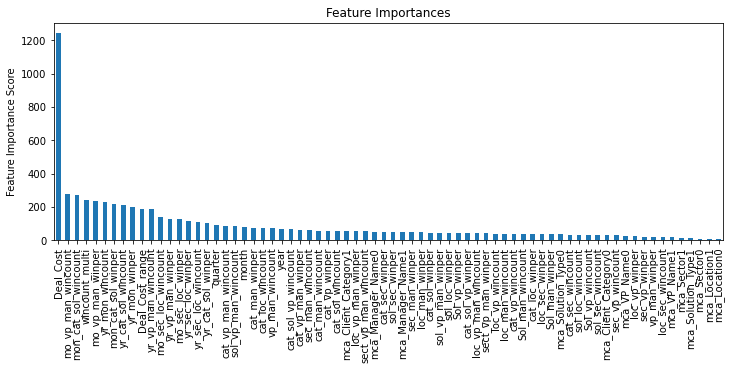

In [33]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
model.get_booster().feature_names = [c for c in X1.columns.values]
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp  
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
xgcol = [c for c in X1.columns.values]
#from xgboost import plot_importance
#from matplotlib import pyplot
#plot_importance(model)
#pyplot.show()

In [27]:
model.best_ntree_limit
model.save_model(r"C:\Users\kt186034\OneDrive \Documents\Documents\pesronal\learning\R\16Jan\Final Project\Xgboostmodel97.2.json")
model.save_model(r"C:\Users\kt186034\OneDrive \Documents\Documents\pesronal\learning\R\16Jan\Final Project\Xgboostmodel97.2.txt")

In [ ]:
from xgboost import XGBClassifier
model2 = XGBClassifier()
model2.load_model(r"C:\Users\kt186034\OneDrive \Documents\Documents\pesronal\learning\R\16Jan\Final Project\Xgboostmodel97.2.json")
#model2.best_ntree_limit

In [38]:
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# define custom class 
class MyXGBClassifier(XGBClassifier):
	@property
	def coef_(self):
		return None


thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train[xgcol])
	# train model
	selection_model = XGBClassifier(n_estimators=500,use_label_encoder=False,eval_metric='logloss')
	selection_model.fit(select_X_train, y_train.values.ravel())
	# eval model
	select_X_test = selection.transform(X_test[xgcol])
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_test, predictions.ravel())
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.001, n=72, Accuracy: 96.77%
Thresh=0.001, n=71, Accuracy: 96.60%
Thresh=0.002, n=70, Accuracy: 96.71%
Thresh=0.002, n=69, Accuracy: 96.42%
Thresh=0.002, n=68, Accuracy: 96.60%
Thresh=0.002, n=67, Accuracy: 96.30%
Thresh=0.002, n=66, Accuracy: 96.65%
Thresh=0.002, n=65, Accuracy: 96.71%
Thresh=0.002, n=64, Accuracy: 96.65%
Thresh=0.003, n=63, Accuracy: 96.42%
Thresh=0.003, n=62, Accuracy: 96.71%
Thresh=0.003, n=61, Accuracy: 96.54%
Thresh=0.003, n=60, Accuracy: 96.60%
Thresh=0.003, n=59, Accuracy: 96.60%
Thresh=0.003, n=58, Accuracy: 96.60%
Thresh=0.003, n=57, Accuracy: 96.60%
Thresh=0.003, n=56, Accuracy: 96.60%
Thresh=0.003, n=55, Accuracy: 96.54%
Thresh=0.004, n=54, Accuracy: 96.60%
Thresh=0.004, n=53, Accuracy: 96.60%
Thresh=0.004, n=52, Accuracy: 96.71%
Thresh=0.004, n=51, Accuracy: 96.83%
Thresh=0.004, n=50, Accuracy: 96.83%
Thresh=0.004, n=49, Accuracy: 96.65%
Thresh=0.004, n=48, Accuracy: 96.77%
Thresh=0.004, n=47, Accuracy: 96.36%
Thresh=0.004, n=46, Accuracy: 96.65%
T

# PARAMETER TUNING XGBOOST
    https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [83]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=target.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], target,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Predict Testing set:
    dtest_predictions = alg.predict(X_test[predictors])
    dtest_predprob = alg.predict_proba(X_test[predictors])[:,1]
        
    #Print model report:
    print( "\nModel Report")
    print( "Accuracy Train: %.4g" % metrics.accuracy_score(target.values, dtrain_predictions))
    print( "AUC Score (Train): %f" % metrics.roc_auc_score(target, dtrain_predprob))
    
    print( "Accuracy Test: %.4g" % metrics.accuracy_score(y_test.values, dtest_predictions))
    print( "AUC Score (Test): %f" % metrics.roc_auc_score(y_test, dtest_predprob))
    print("best iteration: {}".format(alg.get_booster().best_iteration))
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [81]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics   #Additional scklearn functions
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
#train = X_train
train = X_train[[c for c in spike_cols if c not in ['winper_multi','timevalue','day', 'dayofyear','weekofyear', 'weekday', 'is_month_start', 'is_month_end']]]
target = y_train

C:\Users\kt186034\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kt186034\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



Model Report
Accuracy Train: 0.9993
AUC Score (Train): 0.999995
Accuracy Test: 0.9396
AUC Score (Test): 0.986585
best iteration: 537


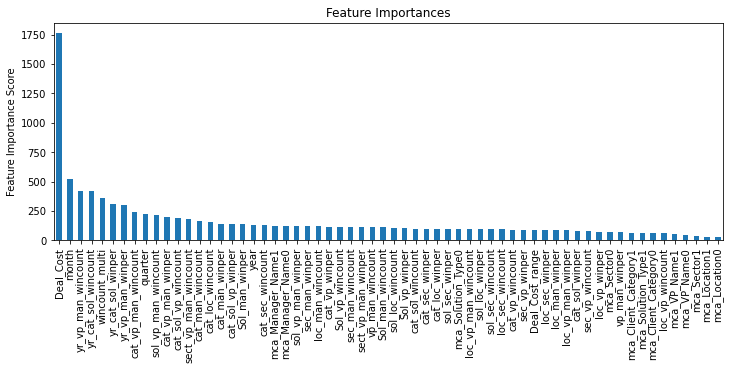

In [84]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

In [455]:
#{'max_depth': 5, 'min_child_weight': 1},
# 0.9632194779727075)

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=428, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=True,use_label_encoder=False), 
 param_grid = param_test1, scoring='roc_auc', cv=5)
gsearch1.fit(train[predictors],target)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([1.49439878, 1.6395998 , 2.05020108, 3.85895901, 2.79119821,
         2.75221853, 4.28939767, 3.92132287, 3.70989852, 5.1827239 ,
         4.94980931, 4.85660706]),
  'std_fit_time': array([0.09289942, 0.12310628, 0.17958353, 0.46751105, 0.04526173,
         0.10287768, 0.35094652, 0.08169559, 0.16774218, 0.18069303,
         0.22461129, 0.4362658 ]),
  'mean_score_time': array([0.01000147, 0.01159978, 0.01359997, 0.01600032, 0.01340261,
         0.01419787, 0.01640258, 0.01479297, 0.01679959, 0.01878576,
         0.01918941, 0.0197928 ]),
  'std_score_time': array([0.00289844, 0.00149557, 0.00119944, 0.00389751, 0.00135496,
         0.00231258, 0.00215407, 0.0021251 , 0.00132883, 0.00305758,
         0.00193039, 0.00332076]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

In [457]:
#{'max_depth': 5, 'min_child_weight': 1},
# 0.9632194779727075)

param_test1 = {
 'max_depth':range(4,6,1),
 'min_child_weight':range(1,2,1)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=428, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=True,use_label_encoder=False), 
 param_grid = param_test1, scoring='roc_auc', cv=5)
gsearch1.fit(train[predictors],target)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([2.49159932, 3.54840078]),
  'std_fit_time': array([0.23766312, 0.43377204]),
  'mean_score_time': array([0.01440182, 0.01619949]),
  'std_score_time': array([0.00195896, 0.00271146]),
  'param_max_depth': masked_array(data=[4, 5],
               mask=[False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 1],
               mask=[False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 4, 'min_child_weight': 1},
   {'max_depth': 5, 'min_child_weight': 1}],
  'split0_test_score': array([0.96157743, 0.96199308]),
  'split1_test_score': array([0.95772915, 0.96059617]),
  'split2_test_score': array([0.95733712, 0.96101182]),
  'split3_test_score': array([0.96065336, 0.96258922]),
  'split4_test_score': array([0.96787853, 0.96990711]),
  'mean_test_score': array([0.96103512, 0.96321948]),
  'std_test_score': array([0.00379148, 0.00341705]),
  'rank_test_score': ar

In [458]:
#{'max_depth': 5, 'min_child_weight': 1},
# 0.9632194779727075)

param_test1 = {
 'min_child_weight':range(6,12,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=428, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=True,use_label_encoder=False), 
 param_grid = param_test1, scoring='roc_auc', cv=5)
gsearch1.fit(train[predictors],target)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([2.86839838, 3.00039973, 3.17719889]),
  'std_fit_time': array([0.15617152, 0.20243157, 0.1117249 ]),
  'mean_score_time': array([0.01440125, 0.01520123, 0.01640229]),
  'std_score_time': array([0.00102028, 0.00421484, 0.00206048]),
  'param_min_child_weight': masked_array(data=[6, 8, 10],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_child_weight': 6},
   {'min_child_weight': 8},
   {'min_child_weight': 10}],
  'split0_test_score': array([0.95862303, 0.95567335, 0.95523172]),
  'split1_test_score': array([0.95583984, 0.95540294, 0.95483851]),
  'split2_test_score': array([0.9558115 , 0.9544394 , 0.95245799]),
  'split3_test_score': array([0.95998362, 0.95887843, 0.95744902]),
  'split4_test_score': array([0.96624716, 0.96375282, 0.961833  ]),
  'mean_test_score': array([0.95930103, 0.95762939, 0.95636205]),
  'std_test_score': array([0.00382965, 0.00340634, 0.0031608 ]),
  'rank_test_score':

In [459]:
#{'max_depth': 5, 'min_child_weight': 1},
# 0.9632194779727075)
#{'gamma': 0.1},
# 0.9635250071702657)
param_test1 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=428, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=True,use_label_encoder=False), 
 param_grid = param_test1, scoring='roc_auc', cv=5)
gsearch1.fit(train[predictors],target)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([2.85399895, 3.02502065, 2.9382308 , 3.00299911, 2.96440825]),
  'std_fit_time': array([0.03693272, 0.24159969, 0.06642211, 0.06772084, 0.0871257 ]),
  'mean_score_time': array([0.01360164, 0.01138468, 0.01236963, 0.0162003 , 0.01299086]),
  'std_score_time': array([0.00135802, 0.00163925, 0.00205144, 0.00146793, 0.00127091]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.96199308, 0.96353522, 0.96196946, 0.96201433, 0.96144045]),
  'split1_test_score': array([0.96059617, 0.96042849, 0.95926421, 0.96022067, 0.95790863]),
  'split2_test_score': array([0.96101182, 0.96138259, 0.96138732, 0.961444  , 0.96079691]),
  'split3_test_score': array([0.96258922, 0.96250166, 0.96018715, 0.96121187, 0.96186505]),

C:\Users\kt186034\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kt186034\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



Model Report
Accuracy Train: 0.991
AUC Score (Train): 0.999674
Accuracy Test: 0.9249
AUC Score (Test): 0.976416
best iteration: 425


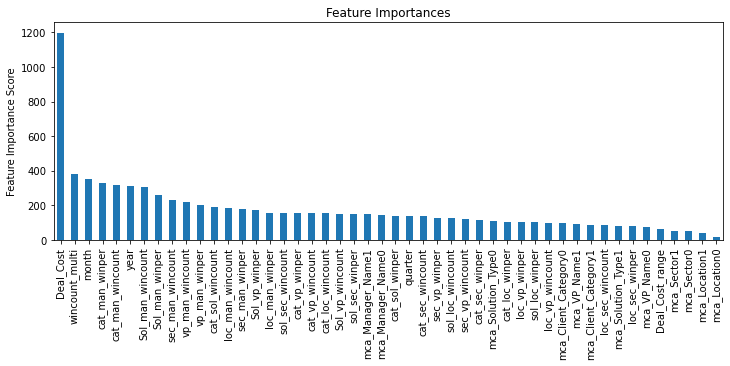

In [462]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=426,
 max_depth=5,
 min_child_weight=1,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

In [464]:
#{'max_depth': 5, 'min_child_weight': 1},
# 0.9632194779727075)
#{'gamma': 0.1},
# 0.9635250071702657)
#{'colsample_bytree': 0.9, 'subsample': 0.9}, 0.9636500818105859)
param_test1 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=427, max_depth=5,
 min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=True,use_label_encoder=False), 
 param_grid = param_test1, scoring='roc_auc', cv=5)
gsearch1.fit(train[predictors],target)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([2.99139886, 3.19879823, 3.15319996, 2.40279951, 2.98905482,
         3.06815615, 2.9853982 , 2.84159265, 3.19719925, 3.28833103,
         3.05280824, 3.26036983, 3.6790843 , 3.38790278, 3.62038231,
         3.37364817]),
  'std_fit_time': array([0.06376104, 0.34285729, 0.37476226, 0.03063745, 0.25281061,
         0.23138404, 0.12698847, 0.17550486, 0.06674645, 0.15212551,
         0.09242277, 0.24342261, 0.29033906, 0.13608922, 0.29142023,
         0.22738806]),
  'mean_score_time': array([0.01560044, 0.01860147, 0.01760154, 0.01400175, 0.01359415,
         0.01538467, 0.01640863, 0.01420226, 0.01379972, 0.01419392,
         0.01419239, 0.01799383, 0.01618681, 0.01479936, 0.01399989,
         0.01459365]),
  'std_score_time': array([0.0007999 , 0.00224557, 0.00205867, 0.00141462, 0.00196293,
         0.00079718, 0.0010184 , 0.00160207, 0.00132853, 0.0013283 ,
         0.00160344, 0.00806073, 0.00098314, 0.00337231, 0.00063347,
         0.00184507]),
  'param_c

In [465]:
#{'max_depth': 5, 'min_child_weight': 1},
# 0.9632194779727075)
#{'gamma': 0.1},
# 0.9635250071702657)
#{'colsample_bytree': 0.9, 'subsample': 0.9}, 0.9636500818105859)
param_test1 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(85,90,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=427, max_depth=5,
 min_child_weight=1, gamma=0.1, subsample=0.9, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=True,use_label_encoder=False), 
 param_grid = param_test1, scoring='roc_auc', cv=5)
gsearch1.fit(train[predictors],target)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([3.12082157, 3.40547409, 3.11433802]),
  'std_fit_time': array([0.20852398, 0.44158475, 0.22969151]),
  'mean_score_time': array([0.01280103, 0.01459908, 0.0144012 ]),
  'std_score_time': array([0.00231502, 0.00257614, 0.00205787]),
  'param_colsample_bytree': masked_array(data=[0.85, 0.85, 0.85],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.85, 0.9, 0.95],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'colsample_bytree': 0.85, 'subsample': 0.85},
   {'colsample_bytree': 0.85, 'subsample': 0.9},
   {'colsample_bytree': 0.85, 'subsample': 0.95}],
  'split0_test_score': array([0.96262835, 0.96335574, 0.96282437]),
  'split1_test_score': array([0.96124562, 0.96155027, 0.96265551]),
  'split2_test_score': array([0.9630192 , 0.96126215, 0.96363087]),
  'split3_test_score': array([0.96299864, 0.96346012, 0.9630

In [466]:
#{'max_depth': 5, 'min_child_weight': 1},
# 0.9632194779727075)
#{'gamma': 0.1},
# 0.9635250071702657)
#{'colsample_bytree': 0.85, 'subsample': 0.95}, 0.9642628604201079)
param_test1 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=427, max_depth=5,
 min_child_weight=1, gamma=0.1, subsample=0.95, colsample_bytree=0.85,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=True,use_label_encoder=False), 
 param_grid = param_test1, scoring='roc_auc', cv=5)
gsearch1.fit(train[predictors],target)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([2.83070002, 3.02020779, 2.99080968, 3.31539884, 1.50152683]),
  'std_fit_time': array([0.09508229, 0.12514293, 0.13248412, 0.21981505, 0.16131085]),
  'mean_score_time': array([0.01159625, 0.01259217, 0.01378431, 0.01460052, 0.01378822]),
  'std_score_time': array([0.00135732, 0.00272831, 0.00249256, 0.0016247 , 0.00160702]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.96282437, 0.9640784 , 0.9630936 , 0.96298496, 0.89446811]),
  'split1_test_score': array([0.96265551, 0.96252562, 0.96273817, 0.96227057, 0.89463815]),
  'split2_test_score': array([0.96363087, 0.96270511, 0.9624902 , 0.96259883, 0.89876865]),
  'split3_test_score': array([0.96300574, 0.96304124, 0.9622721 ,

In [467]:
#{'max_depth': 5, 'min_child_weight': 1},
# 0.9632194779727075)
#{'gamma': 0.1},
# 0.9635250071702657)
#{'colsample_bytree': 0.85, 'subsample': 0.95}, 0.9642628604201079)
#{'reg_alpha': 0.01},0.96439427772934)
#{'reg_alpha': 0.05},0.9646462499770921)
param_test1 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=427, max_depth=5,
 min_child_weight=1, gamma=0.1, subsample=0.95, colsample_bytree=0.85,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,silent=True,use_label_encoder=False), 
 param_grid = param_test1, scoring='roc_auc', cv=5)
gsearch1.fit(train[predictors],target)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([3.44719863, 3.38019929, 3.19480081, 3.23680153, 3.57982531]),
  'std_fit_time': array([0.16539126, 0.22333398, 0.12639474, 0.13259964, 0.40840926]),
  'mean_score_time': array([0.01500263, 0.01620083, 0.01579919, 0.01419668, 0.01400056]),
  'std_score_time': array([0.00189635, 0.00116666, 0.00171814, 0.00116652, 0.00109537]),
  'param_reg_alpha': masked_array(data=[0, 0.001, 0.005, 0.01, 0.05],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0},
   {'reg_alpha': 0.001},
   {'reg_alpha': 0.005},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.05}],
  'split0_test_score': array([0.96282437, 0.96403353, 0.96324946, 0.9640784 , 0.96275352]),
  'split1_test_score': array([0.96265551, 0.96181005, 0.96164237, 0.96252562, 0.9630192 ]),
  'split2_test_score': array([0.96363087, 0.96343485, 0.9644291 , 0.96270511, 0.96352932]),
  'split3_test_score': array([0.96300574, 0.96316903, 0.964

C:\Users\kt186034\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kt186034\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



Model Report
Accuracy Train: 0.9962
AUC Score (Train): 0.999960
Accuracy Test: 0.9313
AUC Score (Test): 0.978390
best iteration: 343


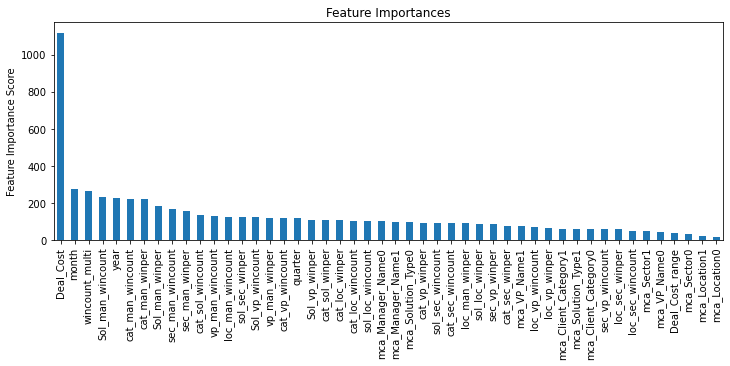

In [490]:
#{'max_depth': 5, 'min_child_weight': 1},
# 0.9632194779727075)
#{'gamma': 0.1},
# 0.9635250071702657)
#{'colsample_bytree': 0.85, 'subsample': 0.95}, 0.9642628604201079)
#{'reg_alpha': 0.05},0.9646462499770921)
#reg_lmbda need to check
xgb1 = XGBClassifier(
 learning_rate =0.175,
 n_estimators=344,
 max_depth=5,
 min_child_weight=1,
 gamma=0.1,
 subsample=0.95,
 colsample_bytree=0.85,
 reg_alpha=0.02,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

C:\Users\kt186034\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kt186034\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



Model Report
Accuracy Train: 0.9991
AUC Score (Train): 0.999998
Accuracy Test: 0.9419
AUC Score (Test): 0.987408
best iteration: 146


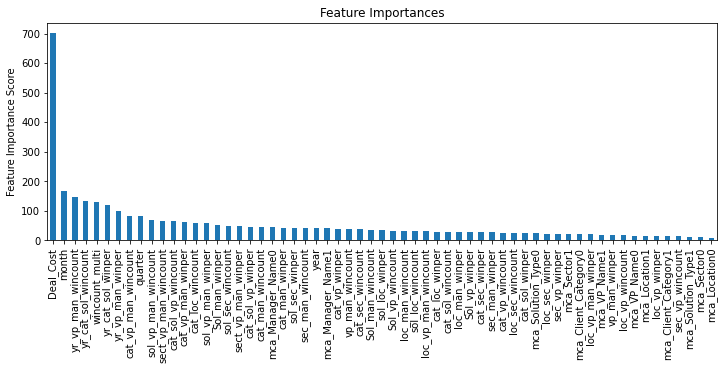

In [85]:
#{'max_depth': 5, 'min_child_weight': 1},
# 0.9632194779727075)
#{'gamma': 0.1},
# 0.9635250071702657)
#{'colsample_bytree': 0.85, 'subsample': 0.95}, 0.9642628604201079)
#{'reg_alpha': 0.05},0.9646462499770921)
#reg_lmbda need to check
xgb1 = XGBClassifier(
 n_estimators=500
)
modelfit(xgb1, train, predictors)